Table of contents:
1. ORA testing and pipeline
2. Venn diagram testing for visualization
3. Network creation testing for import into Cytoscape enrichment map
4. Queries to find candidate genes
5. Clustermap creation for visualization purposes

**1. ORA testing and pipeline**

In [ ]:
!pip install gseapy==1.1.6 #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
!mkdir analysis_results

In [ ]:

import os
import gseapy as gp
import pandas as pd
import time
def perform_pathway_analysis(gene_list, pathway_db, output_dir,phenotype):
    """
    Perform pathway enrichment analysis using GSEApy.

    Args:
    - gene_list (list): List of genes for analysis.
    - pathway_db (str): Pathway database (e.g., "KEGG_2021_Human").
    - output_dir (str): Directory to save results.
    - phenotype (str): Phenotype name for file naming.

    """


    try:
      time.sleep(10)
      enrichr_results = gp.enrichr(
          gene_list=gene_list,
          gene_sets=pathway_db,
          organism="Human",
          outdir=output_dir,
          cutoff=0.05
      )
    except ValueError as e:
      time.sleep(10)
      print(f"Error in perform_pathway_analysis: {e}")
      print('Changed cutoff to 0.25')
      enrichr_results = gp.enrichr(
          gene_list=gene_list,
          gene_sets=pathway_db,
          organism="Human",
          outdir=output_dir,
          cutoff= 0.25
      )


    pathway_results_file = os.path.join(output_dir, f"{phenotype} pathway_enrichment_results.csv")
    enrichr_results.results.to_csv(pathway_results_file, index=False)

    df = pd.read_csv(pathway_results_file)
    sig_df = df[df['P-value'] < 0.05]
    sig_df = sig_df.sort_values(by="P-value", ascending = True)
    sig_results_file = os.path.join(output_dir, f"sig_{phenotype}_pathway_enrichment_results.csv")
    sig_df.to_csv(sig_results_file, index=False)
    print(f"Pathway analysis results saved to {pathway_results_file}")
    return enrichr_results

In [ ]:
import pickle
with open('gene_symbols_dict.pkl', 'rb') as f:
    gene_dic = pickle.load(f)

Running pathway analysis for end only...
Pathway analysis results saved to analysis_results/end only_pathway/end only pathway_enrichment_results.csv


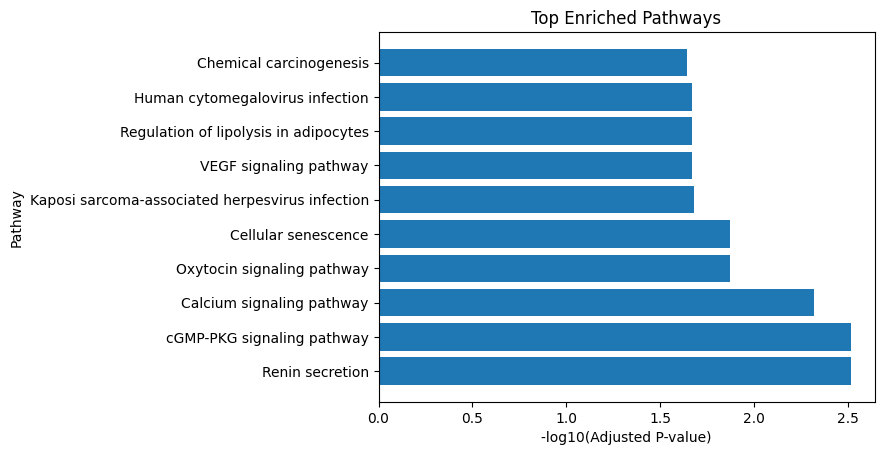

Running pathway analysis for pow only...
Error in perform_pathway_analysis: Warning: No enrich terms when cutoff = 0.05
Changed cutoff to 0.25
Pathway analysis results saved to analysis_results/pow only_pathway/pow only pathway_enrichment_results.csv


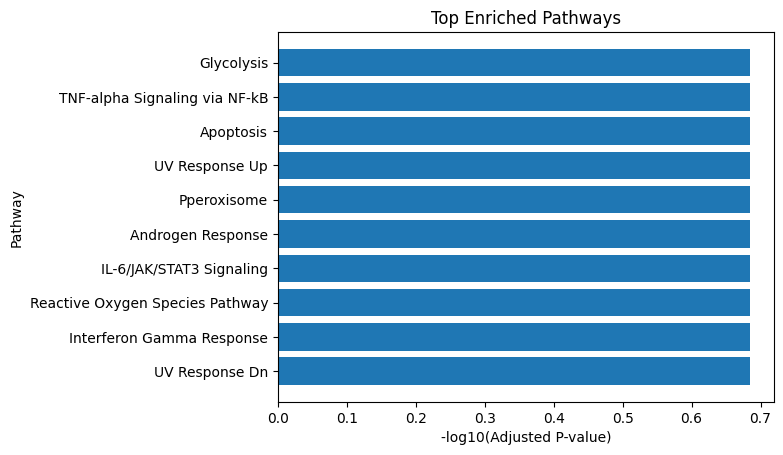

Running pathway analysis for str only...
Error in perform_pathway_analysis: Warning: No enrich terms when cutoff = 0.05
Changed cutoff to 0.25
Pathway analysis results saved to analysis_results/str only_pathway/str only pathway_enrichment_results.csv


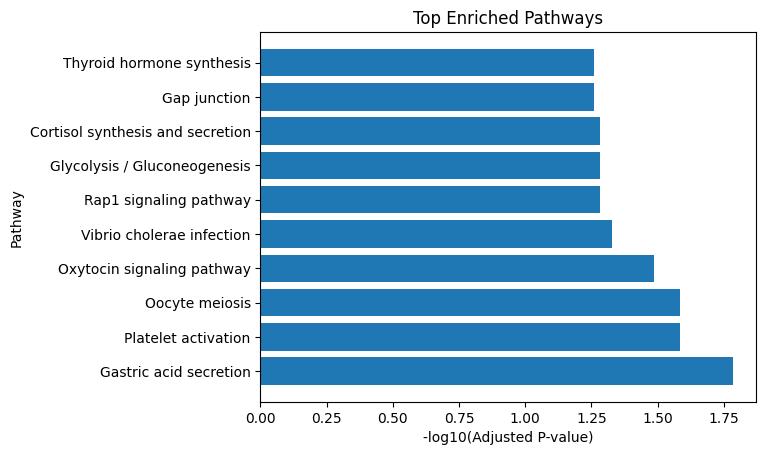

Running pathway analysis for shared...
Pathway analysis results saved to analysis_results/shared_pathway/shared pathway_enrichment_results.csv


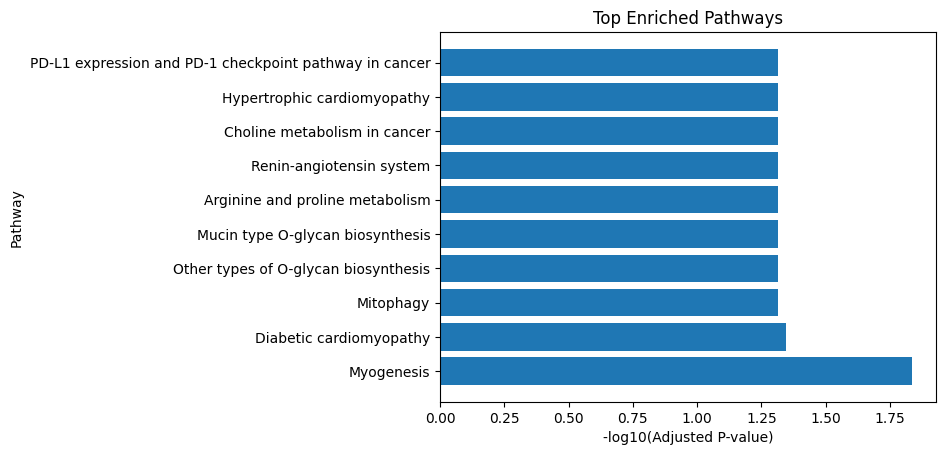

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

for phenotype, gene_list in gene_dic.items():
    print(f"Running pathway analysis for {phenotype}...")
    res = perform_pathway_analysis(list(gene_list), ['MSigDB_Hallmark_2020',"KEGG_2021_Human"], f"analysis_results/{phenotype}_pathway",phenotype)

    df = pd.DataFrame(res.results)


    df = df.sort_values(by="Adjusted P-value").head(10)

    plt.barh(df["Term"], -df["Adjusted P-value"].apply(lambda x: np.log10(x)))
    plt.xlabel("-log10(Adjusted P-value)")
    plt.ylabel("Pathway")
    plt.title("Top Enriched Pathways")
    plt.show()


TESTING BELOW

Pathway analysis results saved to analysis_results/shared_pathway/shared pathway_enrichment_results.csv


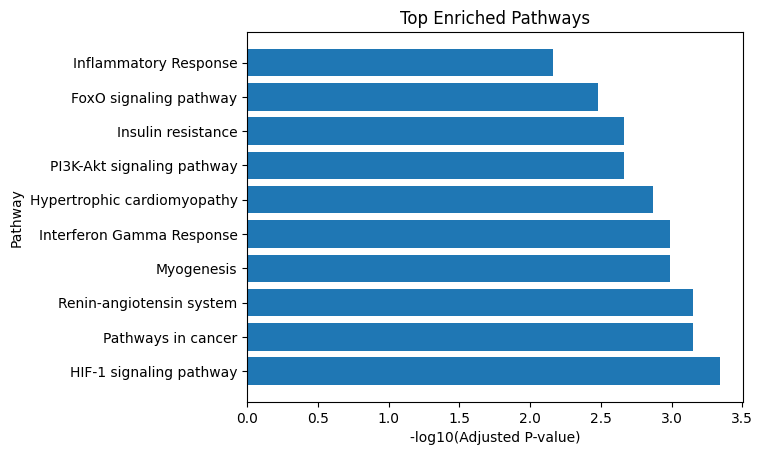

In [ ]:
#@title test

def perform_pathway_analysis2(gene_list, pathway_db, output_dir, phenotype):
    """
    Perform pathway enrichment analysis using GSEApy.

    Args:
    - gene_list (list): List of genes for analysis.
    - pathway_db (str): Pathway database (e.g., "KEGG_2021_Human").
    - output_dir (str): Directory to save results.
    - phenotype (str): Phenotype name for file naming.

    """
    cutoff = 0.05  # Initial cutoff value

    while True:
        try:
            time.sleep(10)
            enrichr_results = gp.enrichr(
                gene_list=gene_list,
                gene_sets=pathway_db,
                organism="Human",
                outdir=output_dir,
                cutoff=cutoff
            )
            break  # Exit the loop if successful

        except ValueError as e:
            time.sleep(10)
            print(f"Error in perform_pathway_analysis: {e}")
            print(f"Increasing cutoff to {cutoff + 0.05}")
            cutoff += 0.05  # Increase cutoff for the next try


    pathway_results_file = os.path.join(output_dir, f"{phenotype} pathway_enrichment_results.csv")
    enrichr_results.results.to_csv(pathway_results_file, index=False)

    df = pd.read_csv(pathway_results_file)
    sig_df = df[df['P-value'] < 0.05]
    sig_df = sig_df.sort_values(by="P-value", ascending = True)
    sig_results_file = os.path.join(output_dir, f"sig_{phenotype}_pathway_enrichment_results.csv")
    sig_df.to_csv(sig_results_file, index=False)
    print(f"Pathway analysis results saved to {pathway_results_file}")
    return enrichr_results
res = perform_pathway_analysis2(test, ['MSigDB_Hallmark_2020',"KEGG_2021_Human",'Reactome_Pathways_2024','BioPlanet_2019','WikiPathways_2024_Human'], f"analysis_results/{phenotype}_pathway",phenotype)

df = pd.DataFrame(res.results)


df = df.sort_values(by="Adjusted P-value").head(10)

plt.barh(df["Term"], -df["Adjusted P-value"].apply(lambda x: np.log10(x)))
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("Pathway")
plt.title("Top Enriched Pathways")
plt.show()

In [ ]:
print(list(gene_dic['pow only']))

['E2F3', 'TRHR', 'AGRN', 'ACVR1B', 'FHL2', 'ZNF568', 'ILRUN', 'BDNF', 'SOD2', 'CCT3', 'ADAM15', 'HSD17B14', 'NRXN3A', 'IGF2', 'NUP210', 'AKAP6', 'CRTC1', 'UBR5', 'IGSF3', 'PIEZO1', 'CPNE5', 'AUTS2', 'GDF5']


In [ ]:
import gseapy
names = gseapy.get_library_name()
for i in names:
  print(i)

ARCHS4_Cell-lines
ARCHS4_IDG_Coexp
ARCHS4_Kinases_Coexp
ARCHS4_TFs_Coexp
ARCHS4_Tissues
Achilles_fitness_decrease
Achilles_fitness_increase
Aging_Perturbations_from_GEO_down
Aging_Perturbations_from_GEO_up
Allen_Brain_Atlas_10x_scRNA_2021
Allen_Brain_Atlas_down
Allen_Brain_Atlas_up
Azimuth_2023
Azimuth_Cell_Types_2021
BioCarta_2013
BioCarta_2015
BioCarta_2016
BioPlanet_2019
BioPlex_2017
CCLE_Proteomics_2020
CORUM
COVID-19_Related_Gene_Sets
COVID-19_Related_Gene_Sets_2021
Cancer_Cell_Line_Encyclopedia
CellMarker_2024
CellMarker_Augmented_2021
ChEA_2013
ChEA_2015
ChEA_2016
ChEA_2022
Chromosome_Location
Chromosome_Location_hg19
ClinVar_2019
DGIdb_Drug_Targets_2024
DSigDB
Data_Acquisition_Method_Most_Popular_Genes
DepMap_CRISPR_GeneDependency_CellLines_2023
DepMap_WG_CRISPR_Screens_Broad_CellLines_2019
DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
Descartes_Cell_Types_and_Tissue_2021
Diabetes_Perturbations_GEO_2022
DisGeNET
Disease_Perturbations_from_GEO_down
Disease_Perturbations_from_GE

table_1 - endurance.csv
table_2 - power.csv
table_3 - strength.csv
{'table_1 - endurance.csv': ['ACE', 'ACTN3', 'ADRB2', 'ADRB2', 'ADRB3', 'AGTR2', 'AQP1', 'AMPD1', 'BDKRB2', 'CDKN1A', 'CKM', 'COL5A1', 'FTO', 'GABPB1', 'GABPB1', 'GALNTL6', 'GSTP1', 'HFE', 'HIF1A', 'MCT1', 'MtDNA loci', 'MtDNA loci', 'MYBPC3', 'NFATC4', 'NFIA-AS2', 'NOS3', 'PPARA', 'PPARGC1A', 'PPARGC1B', 'PPP3R1', 'PRDM1', 'RBFOX1', 'SIRT1', 'SPEG', 'TFAM', 'TRPM2', 'TSHR', 'UCP2', 'UCP3', 'VEGFA', 'VEGFR2'], 'table_2 - power.csv': ['ACE', 'ACVR1B', 'ACTN3', 'ADAM15', 'ADRB2', 'ADRB2', 'AGRN', 'AGT', 'AGTR2', 'AKAP6', 'AMPD1', 'AUTS2', 'BDNF', 'CCT3', 'CDKN1A', 'CKM', 'CNTFR', 'CPNE5', 'CRTAC1', 'CRTC1', 'E2F3', 'FHL2', 'GALNTL6', 'GDF5', 'HIF1A', 'HSD17B14', 'IGF1', 'IGF2', 'IGSF3', 'IL6', 'ILRUN', 'MTHFR', 'NOS3', 'NRXN3', 'NUP210', 'PIEZO1', 'PPARA', 'PPARG', 'PPARG', 'SLC39A8', 'SOD2', 'TRHR', 'UBR5', 'UBR5', 'ZNF568'], 'table_3 - strength.csv': ['ABHD17C', 'ACE', 'ACTG1', 'ACTN3', 'ADCY3', 'ADPGK', 'AGT', 'ALDH2',

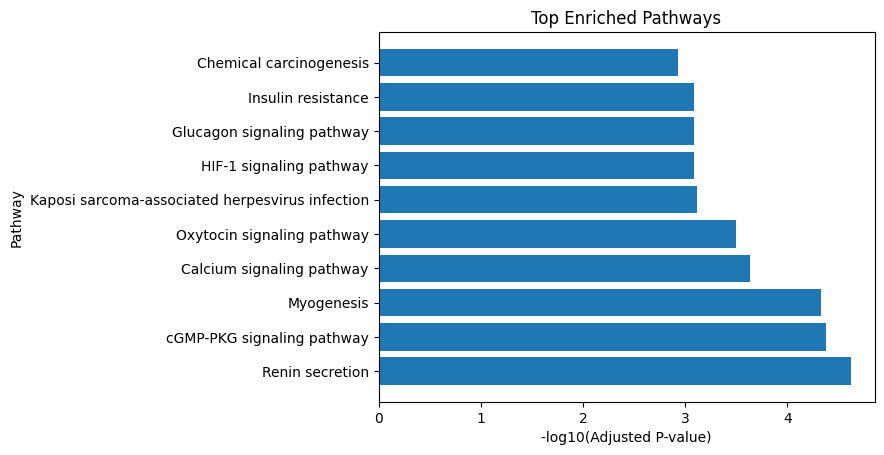

Running pathway analysis for table_2 - power.csv...
Pathway analysis results saved to analysis_results/table_2 - power.csv_pathway/table_2 - power.csv pathway_enrichment_results.csv


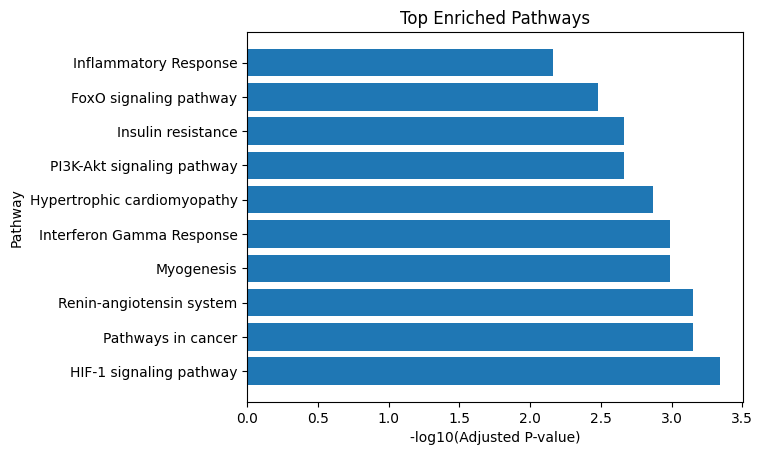

Running pathway analysis for table_3 - strength.csv...
Pathway analysis results saved to analysis_results/table_3 - strength.csv_pathway/table_3 - strength.csv pathway_enrichment_results.csv


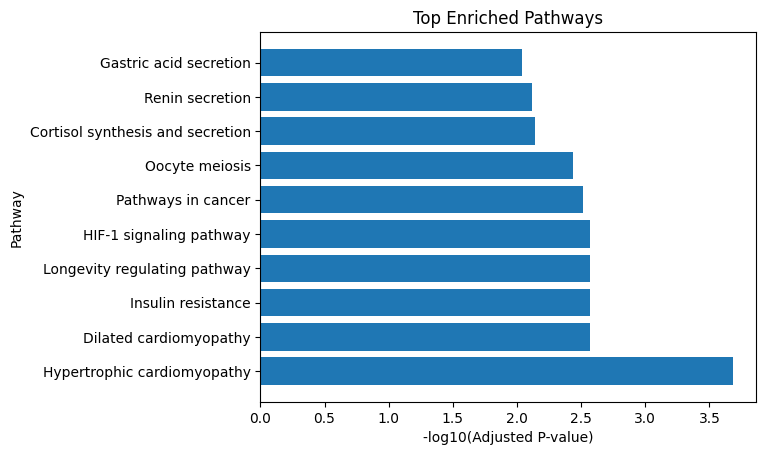

In [ ]:
#@title test

def perform_pathway_analysis2(gene_list, pathway_db, output_dir, phenotype):

    cutoff = 0.05  # Initial cutoff value

    while True:
        try:
            time.sleep(10)
            enrichr_results = gp.enrichr(
                gene_list=gene_list,
                gene_sets=pathway_db,
                organism="Human",
                outdir=output_dir,
                cutoff=cutoff
            )
            break  # Exit the loop if successful

        except ValueError as e:
            time.sleep(10)
            print(f"Error in perform_pathway_analysis: {e}")
            print(f"Increasing cutoff to {cutoff + 0.05}")
            cutoff += 0.05  # Increase cutoff for the next try


    pathway_results_file = os.path.join(output_dir, f"{phenotype} pathway_enrichment_results.csv")
    enrichr_results.results.to_csv(pathway_results_file, index=False)

    df = pd.read_csv(pathway_results_file)
    sig_df = df[df['P-value'] < 0.05]
    sig_df = sig_df.sort_values(by="P-value", ascending = True)
    sig_results_file = os.path.join(output_dir, f"sig_{phenotype}_pathway_enrichment_results.csv")
    sig_df.to_csv(sig_results_file, index=False)
    print(f"Pathway analysis results saved to {pathway_results_file}")
    return enrichr_results

import pandas as pd
import numpy as np
import os

paths = ['table_1 - endurance.csv',
 'table_2 - power.csv',
  'table_3 - strength.csv']
dic = {}
for path in paths:
  print(path)
  df = pd.read_csv(path)
  lst =  list((df['Gene']))
  lst.pop(0)
  dic[path] = lst
print(dic)
for phenotype, gene_list in dic.items():
    print(f"Running pathway analysis for {phenotype}...")
    res = perform_pathway_analysis2(gene_list, ['MSigDB_Hallmark_2020',"KEGG_2021_Human"], f"analysis_results/{phenotype}_pathway",phenotype)


    df = pd.DataFrame(res.results)


    df = df.sort_values(by="Adjusted P-value").head(10)

    # Plot
    plt.barh(df["Term"], -df["Adjusted P-value"].apply(lambda x: np.log10(x)))
    plt.xlabel("-log10(Adjusted P-value)")
    plt.ylabel("Pathway")
    plt.title("Top Enriched Pathways")
    plt.show()

In [ ]:
import pickle
with open('gene_symbols_wshared.pkl', 'rb') as f:
    wshared = pickle.load(f)
print(wshared)

{'E': ['ACE', 'ACTN3', 'ADRB2', 'ADRB2', 'ADRB3', 'AGTR2', 'AQP1', 'AMPD1', 'BDKRB2', 'CDKN1A', 'CKM', 'COL5A1', 'FTO', 'GABPB1', 'GABPB1', 'GALNTL6', 'GSTP1', 'HFE', 'HIF1A', 'MCT1', 'MYBPC3', 'NFATC4', 'NOS3', 'PPARA', 'PPARGC1A', 'PPARGC1B', 'PPP3R1', 'PRDM1', 'RBFOX1', 'SIRT1', 'SPEG', 'TFAM', 'TRPM2', 'TSHR', 'UCP2', 'UCP3', 'VEGFA', 'VEGFR2'], 'S': ['ACE', 'ACTN3', 'CKM', 'GALNTL6', 'HIF1A', 'PPARA', 'PPARGC1A', 'AGT', 'CNTFR', 'CRTAC1', 'IGF1', 'IL6', 'MTHFR', 'PPARG', 'SLC39A8', 'ABHD17C', 'ACTG1', 'ADCY3', 'ADPGK', 'ALDH2', 'ANGPT2', 'AR', 'ARPP21', 'BCDIN3D', 'DHODH', 'GBE1', 'GBF1', 'GLIS3', 'ITPR1', 'KIF1B', 'LRPPRC', 'MLN', 'MMS22L', 'NPIPB6', 'PHACTR1', 'PLEKHB1', 'R3HDM1', 'RASGRF1', 'RMC1', 'TFAP2D', 'ZKSCAN5', 'ZNF608'], 'P': ['ACE', 'ACTN3', 'ADRB2', 'ADRB2', 'AGTR2', 'AMPD1', 'CDKN1A', 'CKM', 'GALNTL6', 'HIF1A', 'NOS3', 'PPARA', 'ACVR1B', 'ADAM15', 'AGRN', 'AGT', 'AKAP6', 'AUTS2', 'BDNF', 'CCT3', 'CNTFR', 'CPNE5', 'CRTAC1', 'CRTC1', 'E2F3', 'FHL2', 'GDF5', 'HSD17B14'

Running pathway analysis for E...
Pathway analysis results saved to analysis_results/E_pathway/E pathway_enrichment_results.csv


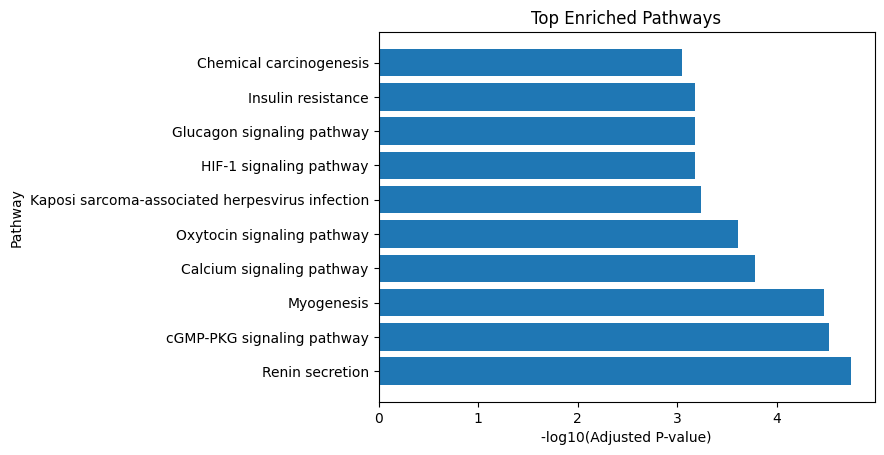

Running pathway analysis for S...
Pathway analysis results saved to analysis_results/S_pathway/S pathway_enrichment_results.csv


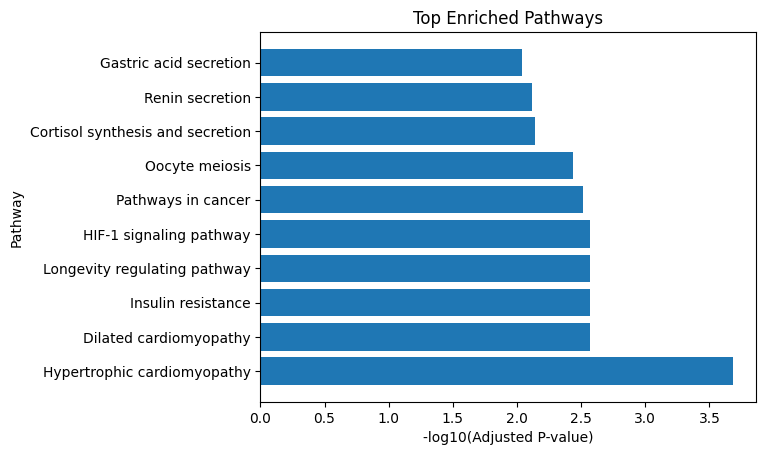

Running pathway analysis for P...
Pathway analysis results saved to analysis_results/P_pathway/P pathway_enrichment_results.csv


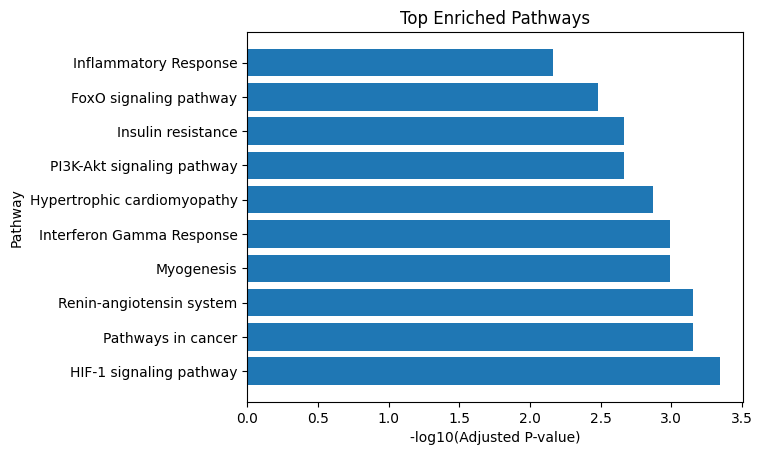

In [ ]:
#@title test wshared

def perform_pathway_analysis2(gene_list, pathway_db, output_dir, phenotype):

    cutoff = 0.05  # Initial cutoff value

    while True:
        try:
            time.sleep(10)
            enrichr_results = gp.enrichr(
                gene_list=gene_list,
                gene_sets=pathway_db,
                organism="Human",
                outdir=output_dir,
                cutoff=cutoff
            )
            break  # Exit the loop if successful

        except ValueError as e:
            time.sleep(10)
            print(f"Error in perform_pathway_analysis: {e}")
            print(f"Increasing cutoff to {cutoff + 0.05}")
            cutoff += 0.05  # Increase cutoff for the next try


    pathway_results_file = os.path.join(output_dir, f"{phenotype} pathway_enrichment_results.csv")
    enrichr_results.results.to_csv(pathway_results_file, index=False)

    df = pd.read_csv(pathway_results_file)
    sig_df = df[df['P-value'] < 0.05]
    sig_df = sig_df.sort_values(by="P-value", ascending = True)
    sig_results_file = os.path.join(output_dir, f"sig_{phenotype}_pathway_enrichment_results.csv")
    sig_df.to_csv(sig_results_file, index=False)
    print(f"Pathway analysis results saved to {pathway_results_file}")
    return enrichr_results

import pandas as pd
import numpy as np

for phenotype, gene_list in wshared.items():
    print(f"Running pathway analysis for {phenotype}...")
    res = perform_pathway_analysis2(gene_list, ['MSigDB_Hallmark_2020',"KEGG_2021_Human"], f"analysis_results/{phenotype}_pathway",phenotype)


    df = pd.DataFrame(res.results)


    df = df.sort_values(by="Adjusted P-value").head(10)


    plt.barh(df["Term"], -df["Adjusted P-value"].apply(lambda x: np.log10(x)))
    plt.xlabel("-log10(Adjusted P-value)")
    plt.ylabel("Pathway")
    plt.title("Top Enriched Pathways")
    plt.show()

**2. Venn diagram testing for visualization**
Use of all db with shared ORA for venn diagram visualization

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def get_significant_pathways(df, p_value_threshold=0.05):
    """Extracts significant pathways based on adjusted p-value."""
    dbdic = {}
    dbdic.fromkeys(df['Gene_set'].unique())
    significant_df = df[df["Adjusted P-value"] < p_value_threshold]
    for index, row in significant_df.iterrows():
        if row["Gene_set"] in dbdic:
            dbdic[row["Gene_set"]].append(row["Term"])
        else:
            dbdic[row["Gene_set"]] = [row["Term"]]
    return dbdic
    #return significant_df["Term"].tolist()

In [ ]:
#@title data prep
paths  = ['end wshared all db.csv',
 'pow wshared all db.csv',
  'str wshared all db.csv']
dic = {}
for path in paths:
  print(path)
  df = pd.read_csv(path)
  print(get_significant_pathways(df))
  dic[path] = get_significant_pathways(df)
#print(dic)
for key in dic:
  print(key)
  for db in dic[key]:
    print(db)
    print(dic[key][db])
    print(len(db))

end wshared all db.csv
{'MSigDB_Hallmark_2020': ['Myogenesis', 'Hypoxia'], 'KEGG_2021_Human': ['Renin secretion', 'cGMP-PKG signaling pathway', 'Calcium signaling pathway', 'Oxytocin signaling pathway', 'Kaposi sarcoma-associated herpesvirus infection', 'Glucagon signaling pathway', 'Insulin resistance', 'HIF-1 signaling pathway', 'Chemical carcinogenesis', 'Regulation of lipolysis in adipocytes', 'VEGF signaling pathway', 'Cellular senescence', 'Renal cell carcinoma', 'Neuroactive ligand-receptor interaction', 'Human cytomegalovirus infection', 'Renin-angiotensin system', 'Apelin signaling pathway', 'Fluid shear stress and atherosclerosis', 'Bladder cancer', 'Pathways in cancer', 'Arginine and proline metabolism', 'Diabetic cardiomyopathy', 'Proteoglycans in cancer', 'Adipocytokine signaling pathway', 'Amphetamine addiction', 'cAMP signaling pathway', 'Human T-cell leukemia virus 1 infection', 'Pancreatic cancer'], 'Reactome_Pathways_2024': ['Transcriptional Activation of Mitochondria

In [ ]:
!pip install venn

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19701 sha256=0cfe0d0a113cbd20973ce21612ae3d90aefb9aabbabad4bca8fc0a5bc6f60ee9
  Stored in directory: /root/.cache/pip/wheels/b8/2a/b1/a1ff9ba87eb919daed348de8c17b00024dfef34b35e7002e6c
Successfully built venn


In [ ]:
print(dic)

{'end wshared all db.csv': {'MSigDB_Hallmark_2020': {'Hypoxia', 'Myogenesis'}, 'KEGG_2021_Human': {'Renin secretion', 'cAMP signaling pathway', 'cGMP-PKG signaling pathway', 'Renin-angiotensin system', 'Bladder cancer', 'Regulation of lipolysis in adipocytes', 'Glucagon signaling pathway', 'Neuroactive ligand-receptor interaction', 'Pancreatic cancer', 'Apelin signaling pathway', 'Insulin resistance', 'Kaposi sarcoma-associated herpesvirus infection', 'Adipocytokine signaling pathway', 'Amphetamine addiction', 'Diabetic cardiomyopathy', 'Pathways in cancer', 'Fluid shear stress and atherosclerosis', 'Human cytomegalovirus infection', 'Cellular senescence', 'Renal cell carcinoma', 'Arginine and proline metabolism', 'Chemical carcinogenesis', 'Human T-cell leukemia virus 1 infection', 'Calcium signaling pathway', 'VEGF signaling pathway', 'Oxytocin signaling pathway', 'Proteoglycans in cancer', 'HIF-1 signaling pathway'}, 'Reactome_Pathways_2024': {'Adrenoceptors', 'MITF-M-regulated Mela

<Figure size 1000x800 with 0 Axes>

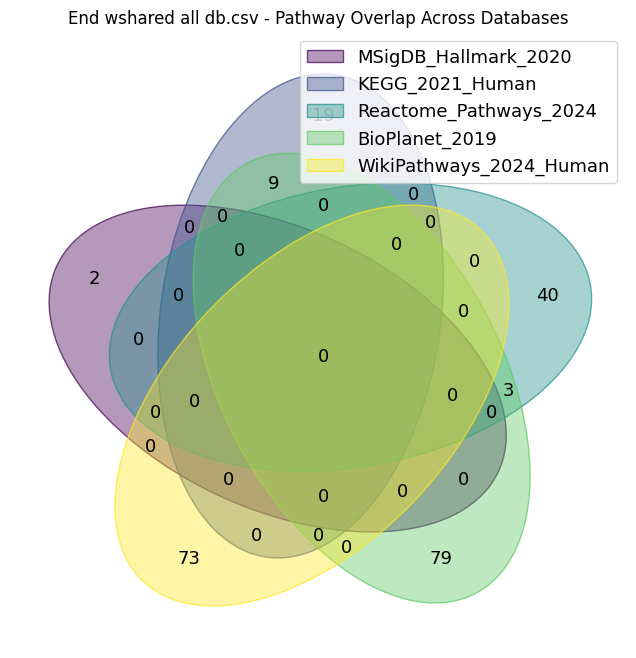

<Figure size 1000x800 with 0 Axes>

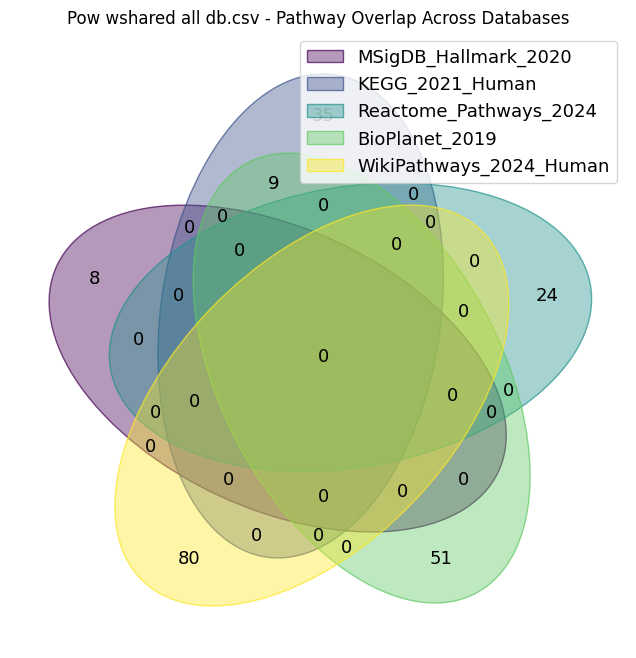

<Figure size 1000x800 with 0 Axes>

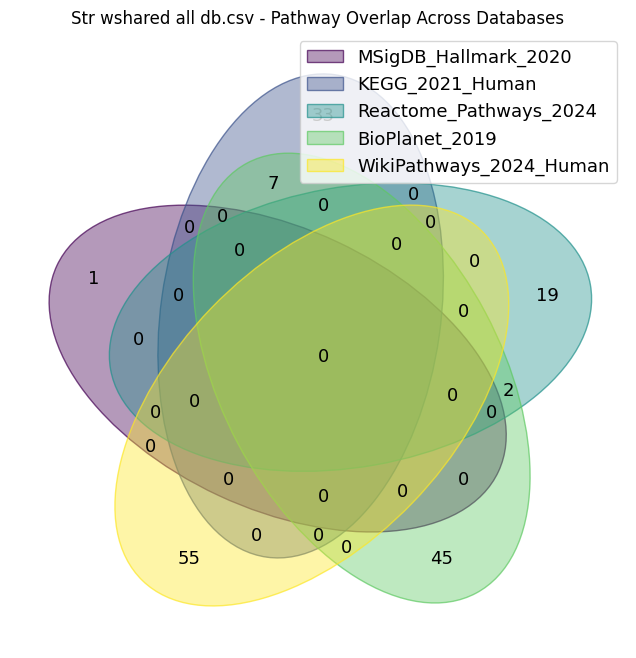

In [ ]:
#@title testing
data = dic

from venn import venn
import matplotlib.pyplot as plt

#
for phen in dic.keys():
  phenotype = phen
  sets_dict = {}

  for db, pathways in data[phenotype].items():
      sets_dict[db] = set(pathways)


  venn_input = {}
  for label, items in sets_dict.items():
      venn_input[label] = items


  plt.figure(figsize=(10, 8))
  venn(venn_input)
  plt.title(f'{phenotype.capitalize()} - Pathway Overlap Across Databases')
  plt.show()


In [ ]:
df = pd.read_csv('end wshared all db.csv')

significant_df = df[df["Adjusted P-value"] < 0.05].copy()


from collections import defaultdict

sig_pathway_dict = defaultdict(dict)

for _, row in significant_df.iterrows():
    db = row['Gene_set']
    pathway = row['Term']
    genes = [gene.strip() for gene in str(row['Genes']).split(';') if gene.strip()]
    sig_pathway_dict[db][pathway] = genes


flat_pathways = []
pathway_labels = []

for db, pathways in sig_pathway_dict.items():
    for pathway_name, genes in pathways.items():
        flat_pathways.append(set(genes))
        pathway_labels.append(f"{db}::{pathway_name}")


import numpy as np
from sklearn.metrics import pairwise_distances


binary_matrix = np.array([[gene in gene_set for gene in set.union(*flat_pathways)] for gene_set in flat_pathways])
jaccard_dist = pairwise_distances(binary_matrix, metric="jaccard")
jaccard_sim = 1 - jaccard_dist


from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform


condensed_dist = squareform(jaccard_dist, checks=False)
linkage_matrix = linkage(condensed_dist, method='average')


clusters = fcluster(linkage_matrix, t=0.5, criterion='distance')


from collections import defaultdict

clustered_pathways = defaultdict(list)
for label, cluster_id in zip(pathway_labels, clusters):
    clustered_pathways[cluster_id].append(label)

dict(list(clustered_pathways.items())[:])


{np.int32(3): ['MSigDB_Hallmark_2020::Myogenesis'],
 np.int32(39): ['MSigDB_Hallmark_2020::Hypoxia',
  'WikiPathways_2024_Human::Pathophysiological Roles Of DUX4 In FSHD1 WP5342',
  'WikiPathways_2024_Human::Focal Adhesion PI3K Akt mTOR Signaling WP3932'],
 np.int32(13): ['KEGG_2021_Human::Renin secretion'],
 np.int32(12): ['KEGG_2021_Human::cGMP-PKG signaling pathway',
  'KEGG_2021_Human::Calcium signaling pathway',
  'BioPlanet_2019::Calcium signaling pathway'],
 np.int32(32): ['KEGG_2021_Human::Oxytocin signaling pathway'],
 np.int32(31): ['KEGG_2021_Human::Kaposi sarcoma-associated herpesvirus infection',
  'KEGG_2021_Human::Cellular senescence',
  'KEGG_2021_Human::Human cytomegalovirus infection',
  'KEGG_2021_Human::Human T-cell leukemia virus 1 infection',
  'BioPlanet_2019::Calcineurin in effects in keratinocyte differentiation'],
 np.int32(23): ['KEGG_2021_Human::Glucagon signaling pathway',
  'KEGG_2021_Human::Insulin resistance',
  'KEGG_2021_Human::Adipocytokine signaling 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


cleaned_labels = [label.split("::")[1].lower() for label in pathway_labels]


vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(cleaned_labels)


name_similarity = cosine_similarity(tfidf_matrix)

# Perform hierarchical clustering on name similarity
name_distance = 1 - name_similarity
name_condensed = squareform(name_distance, checks=False)
name_linkage = linkage(name_condensed, method='average')
name_clusters = fcluster(name_linkage, t=0.7, criterion='distance')

# Group pathways by name-based cluster
name_clustered_pathways = defaultdict(list)
for label, cluster_id in zip(pathway_labels, name_clusters):
    name_clustered_pathways[cluster_id].append(label)


dict(list(name_clustered_pathways.items())[:5])


ValueError: Linkage 'Z' contains negative distances.

In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 9.1 MB/s eta 0:00:00


**3. Network creation testing for import into Cytoscape enrichment map**

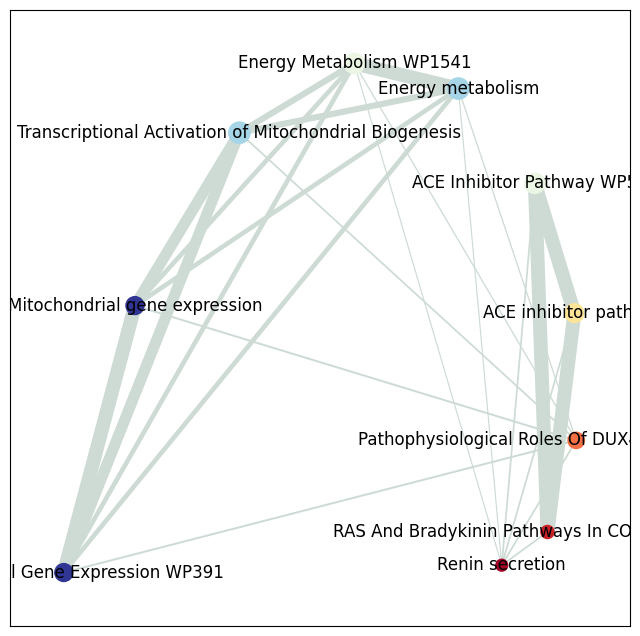

In [ ]:
import gseapy
from gseapy import enrichment_map

nodes, edges = enrichment_map(df)
import networkx as nx

G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])
fig, ax = plt.subplots(figsize=(8, 8))


pos=nx.layout.spiral_layout(G)

nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes['Combined Score']),
                       node_size=list(nodes['Hits_ratio']*1000))

nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())

edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()

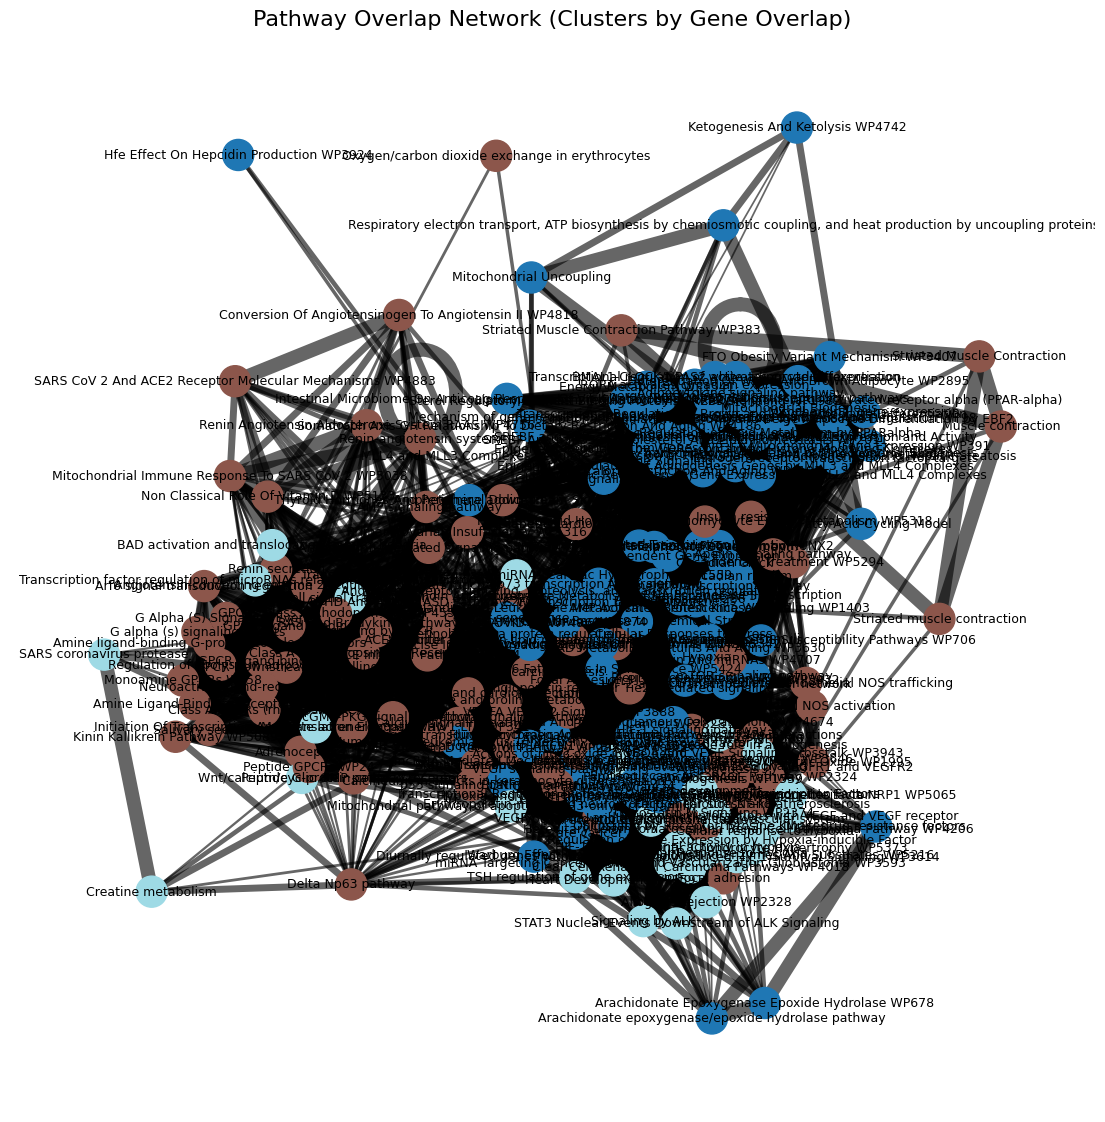

In [ ]:
#@title testing

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms.community import greedy_modularity_communities


file_path = "end wshared all db.csv"
df = pd.read_csv(file_path)


sig_df = df[df['Adjusted P-value'] < 0.05].copy()


sig_df['Genes'] = sig_df['Genes'].astype(str).str.replace(';', ' ')


sig_df['Gene_Set'] = sig_df['Genes'].apply(lambda x: set(x.split()))


G = nx.Graph()


for _, row in sig_df.iterrows():
    G.add_node(row['Term'], genes=row['Gene_Set'], score=row['Combined Score'])


for (idx1, row1), (idx2, row2) in combinations(sig_df.iterrows(), 2):
    genes1, genes2 = row1['Gene_Set'], row2['Gene_Set']
    intersection = genes1.intersection(genes2)
    union = genes1.union(genes2)
    if union:
        jaccard = len(intersection) / len(union)
        if jaccard > 0.1:
            G.add_edge(row1['Term'], row2['Term'], weight=jaccard)


communities = list(greedy_modularity_communities(G))
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i


nx.set_node_attributes(G, community_map, 'cluster')


pos = nx.spring_layout(G, seed=42, k=0.5)
scores = [G.nodes[n]['score'] for n in G.nodes]

sizes = 500
colors = [G.nodes[n]['cluster'] for n in G.nodes]
weights = [G[u][v]['weight'] * 10 for u, v in G.edges]


plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.tab20)
edges = nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
labels = nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Pathway Overlap Network (Clusters by Gene Overlap)", fontsize=16)
plt.axis('off')
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

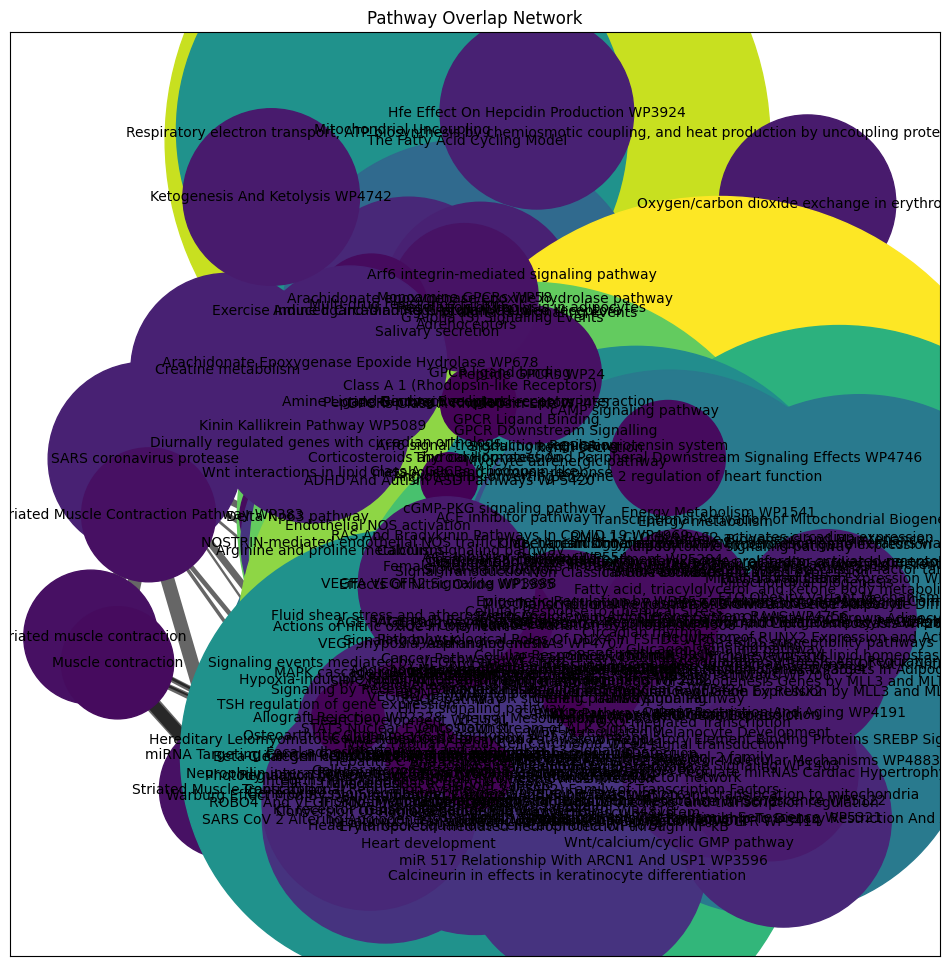

In [ ]:
#@title testing
import pandas as pd


df = pd.read_csv("end wshared all db.csv")


sig_df = df[df['Adjusted P-value'] < 0.05].copy()

sig_df['Genes'] = sig_df['Genes'].str.replace(';', ' ')

from itertools import combinations
import networkx as nx


sig_df['Gene_Set'] = sig_df['Genes'].apply(lambda x: set(x.split()))


G = nx.Graph()


for _, row in sig_df.iterrows():
    G.add_node(row['Term'], genes=row['Gene_Set'], score=row['Combined Score'])


for (idx1, row1), (idx2, row2) in combinations(sig_df.iterrows(), 2):
    genes1, genes2 = row1['Gene_Set'], row2['Gene_Set']
    intersection = genes1.intersection(genes2)
    union = genes1.union(genes2)
    if union:
        jaccard = len(intersection) / len(union)
        if jaccard > 0.1:
            G.add_edge(row1['Term'], row2['Term'], weight=jaccard)

import matplotlib.pyplot as plt


pos = nx.spring_layout(G, k=0.5)


scores = [G.nodes[n]['score'] for n in G.nodes]
sizes = [s * 50 for s in scores]
colors = scores


weights = [G[u][v]['weight'] * 10 for u, v in G.edges]


plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Pathway Overlap Network")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label="Combined Score")
plt.axis('off')
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

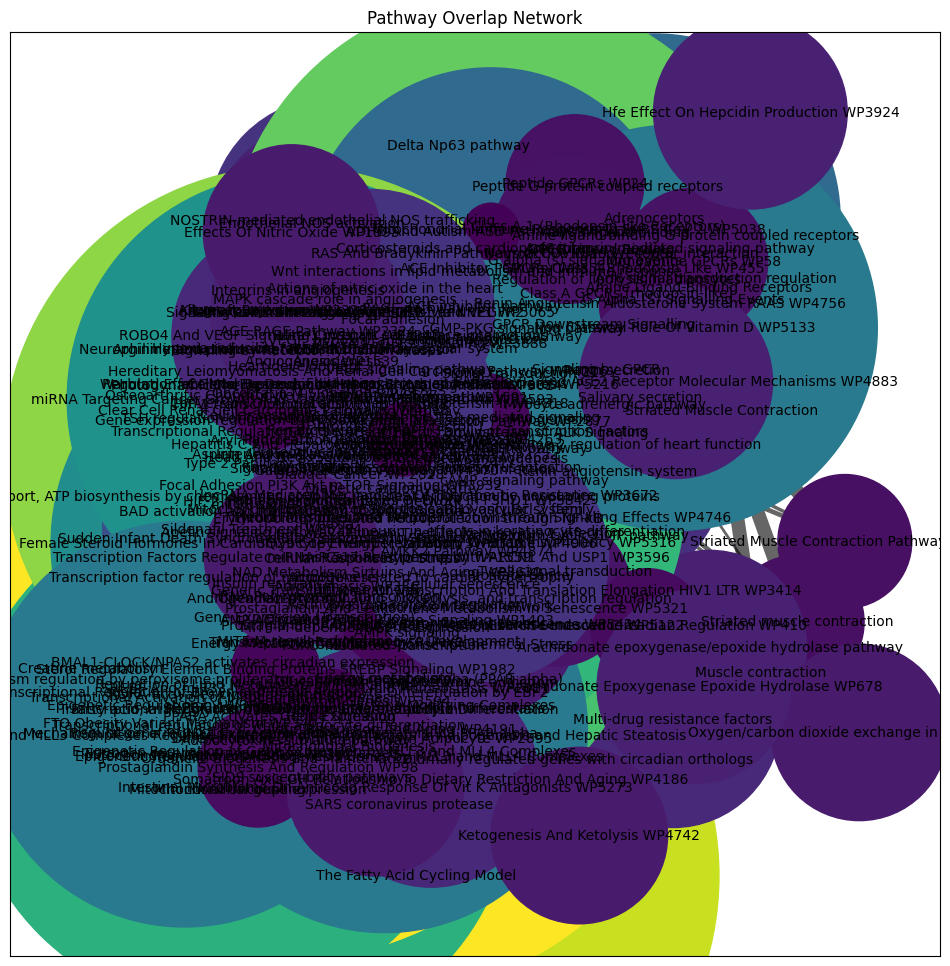

In [ ]:
#@title testing
import pandas as pd


df = pd.read_csv("end wshared all db.csv")


sig_df = df[df['Adjusted P-value'] < 0.05].copy()


sig_df['Genes'] = sig_df['Genes'].str.replace(';', ' ')
from itertools import combinations
import networkx as nx


sig_df['Gene_Set'] = sig_df['Genes'].apply(lambda x: set(x.split()))


G = nx.Graph()


for _, row in sig_df.iterrows():
    G.add_node(row['Term'], genes=row['Gene_Set'], score=row['Combined Score'])


for (idx1, row1), (idx2, row2) in combinations(sig_df.iterrows(), 2):
    genes1, genes2 = row1['Gene_Set'], row2['Gene_Set']
    intersection = genes1.intersection(genes2)
    union = genes1.union(genes2)
    if union:
        jaccard = len(intersection) / len(union)
        if jaccard > 0.1:
            G.add_edge(row1['Term'], row2['Term'], weight=jaccard)
import matplotlib.pyplot as plt


pos = nx.spring_layout(G, k=0.5)


scores = [G.nodes[n]['score'] for n in G.nodes]
sizes = [s * 50 for s in scores]  # scale size
colors = scores


weights = [G[u][v]['weight'] * 10 for u, v in G.edges]


plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Pathway Overlap Network")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label="Combined Score")
plt.axis('off')
plt.show()


In [ ]:
#@title testing
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms.community import greedy_modularity_communities


df = pd.read_csv("end wshared all db.csv")


sig_df = df[df['Adjusted P-value'] < 0.05].copy()
sig_df['Genes'] = sig_df['Genes'].astype(str).str.replace(';', ' ')
sig_df['Gene_Set'] = sig_df['Genes'].apply(lambda x: set(x.split()))


G = nx.Graph()


for _, row in sig_df.iterrows():
    G.add_node(row['Term'], genes=row['Gene_Set'], score=row['Combined Score'])


for (i, row1), (j, row2) in combinations(sig_df.iterrows(), 2):
    genes1, genes2 = row1['Gene_Set'], row2['Gene_Set']
    jaccard = len(genes1 & genes2) / len(genes1 | genes2)
    if jaccard > 0.1:
        G.add_edge(row1['Term'], row2['Term'], weight=jaccard)


communities = list(greedy_modularity_communities(G))
community_map = {node: i for i, com in enumerate(communities) for node in com}
nx.set_node_attributes(G, community_map, "cluster")


pos = nx.spring_layout(G, seed=42, k=1.2)
node_colors = [G.nodes[n]["cluster"] for n in G.nodes]

node_sizes = 500
edge_weights = [G[u][v]["weight"] * 8 for u, v in G.edges]

plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.6)


nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Set2,
    edgecolors='none'
)

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.title("Pathway Network Colored by Cluster", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()
nx.write_graphml(G, "pathway_network.graphml")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title testing
import pandas as pd


enr_results = pd.read_csv('end wshared all db.csv')


nodes = enr_results[['Term', 'Adjusted P-value', 'Genes']].copy()
nodes.columns = ['Name', 'pvalue', 'genes']


def calculate_overlap(genes1, genes2):
    genes1_set = set(genes1.split(';'))
    genes2_set = set(genes2.split(';'))
    return len(genes1_set.intersection(genes2_set)) / len(genes1_set.union(genes2_set))

edges = []
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        overlap = calculate_overlap(nodes.iloc[i]['genes'], nodes.iloc[j]['genes'])
        if overlap > 0.2:
            edges.append([nodes.iloc[i]['Name'], nodes.iloc[j]['Name'], overlap])

edges = pd.DataFrame(edges, columns=['source', 'target', 'overlap'])


nodes.to_csv('nodes.csv', index=False)
edges.to_csv('edges.csv', index=False)

# Now import nodes.csv and edges.csv into Cytoscape's EnrichmentMap app.

**4. Queries to find candidate genes**

In [ ]:

import requests
import json


seed_genes = ['VEGFA', 'CDKN1A', 'PPARGC1A', 'HIF1A', 'PPARA', 'NOS3', 'SIRT1', 'ADRB2']

# Function to query STRING-db
def get_string_interactions(genes, score_threshold=0.7):
    string_api_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"

    request_url = "/".join([string_api_url, output_format, method])

    params = {
        "identifiers": "%0d".join(genes),

        "species": 9606,  # Human
        "required_score": score_threshold * 1000,
        "add_nodes": 10  # Number of additional nodes to show
    }

    response = requests.post(request_url, data=params)
    return response.json()

# Get interactions
interactions = get_string_interactions(seed_genes)


# Extract new genes (not in original dataset)
new_genes = set()
for interaction in interactions:
    if 'preferredName_A' in interaction:
        gene_a = interaction['preferredName_A']
        gene_b = interaction['preferredName_B']
        if gene_a not in seed_genes:
            new_genes.add(gene_a)
        if gene_b not in seed_genes:
            new_genes.add(gene_b)


gene_scores = {}
for interaction in interactions:
    if 'preferredName_A' in interaction:
        gene_a = interaction['preferredName_A']
        gene_b = interaction['preferredName_B']
        score = float(interaction['score'])

        if gene_a not in seed_genes:
            if gene_a not in gene_scores:
                gene_scores[gene_a] = []
            gene_scores[gene_a].append(score)

        if gene_b not in seed_genes:
            if gene_b not in gene_scores:
                gene_scores[gene_b] = []
            gene_scores[gene_b].append(score)

# Calculate average scores
avg_scores = {gene: sum(scores)/len(scores) for gene, scores in gene_scores.items()}

# Sort genes by average interaction score
sorted_genes = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)

print("Top related genes not in your dataset (with average interaction scores):")
for gene, score in sorted_genes[:20]:
    print(f"{gene}: {score:.3f}")

print("\
Total number of new related genes found:", len(sorted_genes))

Top related genes not in your dataset (with average interaction scores):
FOXO3: 0.994
EP300: 0.968
NCOA1: 0.956
PER2: 0.954
ARNTL: 0.947
CREBBP: 0.931
CLOCK: 0.920
ADIPOR2: 0.894
ADIPOR1: 0.820
ADRB3: 0.800
Total number of new related genes found: 10


Sample pipeline for finding candidate genes:

1. determine most frequent genes in significant pathways

2. query string db for high scoring interactions of those genes

3. check if they are included in the most meaningful pathways previously found in enrichment

In [ ]:

import pandas as pd


df = pd.read_csv('end wshared all db.csv')


print("Dataset Info:")
print(df.info())

print("\
First few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gene_set              925 non-null    object 
 1   Term                  925 non-null    object 
 2   Overlap               925 non-null    object 
 3   P-value               925 non-null    float64
 4   Adjusted P-value      925 non-null    float64
 5   Old P-value           925 non-null    int64  
 6   Old Adjusted P-value  925 non-null    int64  
 7   Odds Ratio            925 non-null    float64
 8   Combined Score        925 non-null    float64
 9   Genes                 925 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 72.4+ KB
None
First few rows:
               Gene_set                           Term Overlap   P-value  \
0  MSigDB_Hallmark_2020                     Myogenesis   6/200  0.000002   
1  MSigDB_Hallmark_2020          

In [ ]:

significant_df = df[df['Adjusted P-value'] < 0.05]


significant_df = significant_df.sort_values('Adjusted P-value')


from collections import Counter

gene_lists = significant_df['Genes'].str.split(';')
all_genes = [gene for sublist in gene_lists for gene in sublist]
gene_counts = Counter(all_genes)


gene_freq_df = pd.DataFrame.from_dict(gene_counts, orient='index', columns=['Frequency'])
gene_freq_df = gene_freq_df.sort_values('Frequency', ascending=False)


top_genes = gene_freq_df.head(20)

print('Top 20 genes most frequently involved in significant pathways:')
print(top_genes)


print('Most significant pathways and their genes:')
print(significant_df[['Term', 'Adjusted P-value', 'Genes']].head(10))

Top 20 genes most frequently involved in significant pathways:
          Frequency
VEGFA            78
CDKN1A           63
PPARGC1A         60
HIF1A            53
NOS3             41
PPARA            41
SIRT1            37
ADRB2            35
PPARGC1B         33
BDKRB2           29
ADRB3            28
PPP3R1           27
AGTR2            24
TSHR             19
GSTP1            15
ACE              15
NFATC4           13
TFAM             12
PRDM1            11
COL5A1           10
Most significant pathways and their genes:
                                                  Term  Adjusted P-value  \
698                           Energy Metabolism WP1541      6.260301e-12   
397                                  Energy metabolism      8.301105e-12   
699                        ACE Inhibitor Pathway WP554      2.938943e-06   
700                Mitochondrial Gene Expression WP391      3.182205e-06   
398                              ACE inhibitor pathway      3.897013e-06   
399               

In [ ]:

import requests
import json


seed_genes = list(top_genes.index)

def get_string_interactions(genes, score_threshold=0.7):
    string_api_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"

    request_url = "/".join([string_api_url, output_format, method])

    params = {
        "identifiers": "%0d".join(genes),

        "species": 9606,
        "required_score": score_threshold * 1000,
        "add_nodes": 10
    }

    response = requests.post(request_url, data=params)
    return response.json()

# Get interactions
interactions = get_string_interactions(seed_genes)


# Extract new genes (not in original dataset)
new_genes = set()
for interaction in interactions:
    if 'preferredName_A' in interaction:
        gene_a = interaction['preferredName_A']
        gene_b = interaction['preferredName_B']
        if gene_a not in seed_genes:
            new_genes.add(gene_a)
        if gene_b not in seed_genes:
            new_genes.add(gene_b)

gene_scores = {}
for interaction in interactions:
    if 'preferredName_A' in interaction:
        gene_a = interaction['preferredName_A']
        gene_b = interaction['preferredName_B']
        score = float(interaction['score'])

        if gene_a not in seed_genes:
            if gene_a not in gene_scores:
                gene_scores[gene_a] = []
            gene_scores[gene_a].append(score)

        if gene_b not in seed_genes:
            if gene_b not in gene_scores:
                gene_scores[gene_b] = []
            gene_scores[gene_b].append(score)

# Calculate average scores
avg_scores = {gene: sum(scores)/len(scores) for gene, scores in gene_scores.items()}

# Sort genes by average interaction score
sorted_genes = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)

print("Top related genes not in your dataset (with average interaction scores):")
for gene, score in sorted_genes:
    print(f"{gene}: {score:.3f}")

print("\
Total number of new related genes found:", len(sorted_genes))

Top related genes not in your dataset (with average interaction scores):
GNAI1: 0.933
NRF1: 0.930
GNAI3: 0.928
AGTR1: 0.926
ARNTL: 0.902
AGT: 0.900
CRTC2: 0.883
ESRRA: 0.875
EDN1: 0.867
PRDM16: 0.847
Total number of new related genes found: 10


In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 16.3 MB/s eta 0:00:00


In [ ]:
print(sorted_genes)
gene_names = [gene for gene, score in sorted_genes]
print(gene_names)

[('GNAI1', 0.9326000000000001), ('NRF1', 0.9304), ('GNAI3', 0.9276), ('AGTR1', 0.9264285714285714), ('ARNTL', 0.90225), ('AGT', 0.8998749999999999), ('CRTC2', 0.883), ('ESRRA', 0.8745999999999998), ('EDN1', 0.8668571428571428), ('PRDM16', 0.847)]
['GNAI1', 'NRF1', 'GNAI3', 'AGTR1', 'ARNTL', 'AGT', 'CRTC2', 'ESRRA', 'EDN1', 'PRDM16']


In [ ]:
import gseapy as gp
enr = gp.enrichr(gene_list= gene_names,
                 gene_sets='KEGG_2019_Human',
                 organism='Human')
enr.results.head()


Gene_set                                    Term Overlap  \
0  KEGG_2019_Human                         Renin secretion    5/69   
1  KEGG_2019_Human                Apelin signaling pathway   4/137   
2  KEGG_2019_Human  Adrenergic signaling in cardiomyocytes   4/145   
3  KEGG_2019_Human                        Cushing syndrome   4/155   
4  KEGG_2019_Human                      Pathways in cancer   5/530   

        P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0  1.048211e-10      6.289269e-09            0                     0   
1  4.285354e-07      1.054108e-05            0                     0   
2  5.380308e-07      1.054108e-05            0                     0   
3  7.027386e-07      1.054108e-05            0                     0   
4  2.894764e-06      3.473716e-05            0                     0   

   Odds Ratio  Combined Score                       Genes  
0  311.343750     7154.295057  EDN1;AGTR1;GNAI3;GNAI1;AGT  
1   99.533835     1459.453926      AGTR1;GNAI3;NRF1;GNAI1  
2   93.848700     1354.738833       AGTR1;GNAI3;GNAI1;AGT  
3   87.589404     1240.991276       AGTR1;GNAI3;GNAI1;AGT  
4   37.076190      472.818089  EDN1;AGTR1;GNAI3;GNAI1;AGT

In [ ]:
# For each candidate gene, query KEGG, Reactome, and WikiPathways for exact pathway memberships
# Then match these to the enrichment results (Term column) exactly
import gseapy as gp
from collections import defaultdict


enriched_pathways = set(enrichment_df['Term'])


gene_to_matched_pathways = defaultdict(list)


for gene in candidate_genes:
    # KEGG
    try:
        kegg = gp.get_library_name(organism='Human')
        if 'KEGG_2021_Human' in kegg:
            kegg_pathways = gp.get_library('KEGG_2021_Human')
            for pathway, genes in kegg_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('KEGG error for', gene, e)
    # Reactome
    try:
        reactome = gp.get_library_name(organism='Human')
        if 'Reactome_2024' in reactome:
            reactome_pathways = gp.get_library('Reactome_2024')
            for pathway, genes in reactome_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('Reactome error for', gene, e)
    # WikiPathways
    try:
        wikipathways = gp.get_library_name(organism='Human')
        if 'WikiPathways_2024_Human' in wikipathways:
            wiki_pathways = gp.get_library('WikiPathways_2024_Human')
            for pathway, genes in wiki_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('WikiPathways error for', gene, e)


import pandas as pd
results_df = pd.DataFrame([
    {'Gene': gene, 'Matched_Pathways': '; '.join(paths) if paths else ''}
    for gene, paths in gene_to_matched_pathways.items()
])

print(results_df.head())

In [ ]:

import pandas as pd
enrichment_df = pd.read_csv('end wshared all db.csv')
candidate_genes = gene_names
significant_enrichment_df = enrichment_df[enrichment_df['Adjusted P-value'] < 0.05]

print(significant_enrichment_df)
print(candidate_genes[:10])

                    Gene_set  \
0       MSigDB_Hallmark_2020   
1       MSigDB_Hallmark_2020   
24           KEGG_2021_Human   
25           KEGG_2021_Human   
26           KEGG_2021_Human   
..                       ...   
766  WikiPathways_2024_Human   
767  WikiPathways_2024_Human   
768  WikiPathways_2024_Human   
769  WikiPathways_2024_Human   
770  WikiPathways_2024_Human   

                                                  Term Overlap       P-value  \
0                                           Myogenesis   6/200  1.961586e-06   
1                                              Hypoxia   4/200  5.488816e-04   
24                                     Renin secretion    5/69  1.937774e-07   
25                          cGMP-PKG signaling pathway   6/167  6.852913e-07   
26                           Calcium signaling pathway   6/240  5.614394e-06   
..                                                 ...     ...           ...   
766           Hfe Effect On Hepcidin Production WP3924 

In [ ]:

import gseapy as gp
from collections import defaultdict

enriched_pathways = set(significant_enrichment_df['Term'])

gene_to_matched_pathways = defaultdict(list)


for gene in candidate_genes:
    # KEGG
    try:
        kegg = gp.get_library_name(organism='Human')
        if 'KEGG_2021_Human' in kegg:
            kegg_pathways = gp.get_library('KEGG_2021_Human')
            for pathway, genes in kegg_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('KEGG error for', gene, e)
    # Reactome
    try:
        reactome = gp.get_library_name(organism='Human')
        if 'Reactome_Pathways_2024' in reactome:
            reactome_pathways = gp.get_library('Reactome_Pathways_2024')
            for pathway, genes in reactome_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('Reactome error for', gene, e)
    # WikiPathways
    try:
        wikipathways = gp.get_library_name(organism='Human')
        if 'WikiPathways_2024_Human' in wikipathways:
            wiki_pathways = gp.get_library('WikiPathways_2024_Human')
            for pathway, genes in wiki_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('WikiPathways error for', gene, e)
    #MsigDB
    try:
        msig = gp.get_library_name(organism='Human')
        if 'MSigDB_Hallmark_2020' in msig:
            msig_pathways = gp.get_library('MSigDB_Hallmark_2020')
            for pathway, genes in msig_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('MSigDB_Hallmark_2020 error for', gene, e)
    #BioPlanet_2019
    try:
        bioplanet = gp.get_library_name(organism='Human')
        if 'BioPlanet_2019' in bioplanet:
            bioplanet_pathways = gp.get_library('BioPlanet_2019')
            for pathway, genes in bioplanet_pathways.items():
                if gene in genes and pathway in enriched_pathways:
                    gene_to_matched_pathways[gene].append(pathway)
    except Exception as e:
        print('BioPlanet_2019 error for', gene, e)


import pandas as pd
results_df = pd.DataFrame([
    {'Gene': gene, 'Matched_Pathways': '; '.join(paths) if paths else ''}
    for gene, paths in gene_to_matched_pathways.items()
])

print(results_df.head())

    Gene                                   Matched_Pathways
0  GNAI1  Apelin signaling pathway; Chemical carcinogene...
1   NRF1  Apelin signaling pathway; Cellular Responses t...
2  GNAI3  Apelin signaling pathway; Chemical carcinogene...
3  AGTR1  Apelin signaling pathway; Calcium signaling pa...
4  ARNTL  Circadian rhythm; Cellular Responses to Stimul...


In [ ]:
print(results_df)
print(gene_names)

     Gene                                   Matched_Pathways
0   GNAI1  Apelin signaling pathway; Chemical carcinogene...
1    NRF1  Apelin signaling pathway; Cellular Responses t...
2   GNAI3  Apelin signaling pathway; Chemical carcinogene...
3   AGTR1  Apelin signaling pathway; Calcium signaling pa...
4   ARNTL  Circadian rhythm; Cellular Responses to Stimul...
5     AGT  Diabetic cardiomyopathy; Insulin resistance; N...
6   CRTC2  Glucagon signaling pathway; Human T-cell leuke...
7   ESRRA  Gene Expression (Transcription); Generic Trans...
8    EDN1  Fluid shear stress and atherosclerosis; HIF-1 ...
9  PRDM16  Adipogenesis; Transcriptional Regulation of Br...
['GNAI1', 'NRF1', 'GNAI3', 'AGTR1', 'ARNTL', 'AGT', 'CRTC2', 'ESRRA', 'EDN1', 'PRDM16']


                                               GNAI1  NRF1  GNAI3  AGTR1  \
Pathway                                                                    
ACE Inhibitor Pathway WP554                        0     0      0      1   
ACE inhibitor pathway                              0     0      0      1   
ADHD And Autism ASD Pathways WP5420                0     0      0      1   
AMP Activated Protein Kinase Signaling WP1403      0     0      0      0   
AMPK signaling                                     0     0      0      0   

                                               ARNTL  AGT  CRTC2  ESRRA  EDN1  \
Pathway                                                                         
ACE Inhibitor Pathway WP554                        0    1      0      0     0   
ACE inhibitor pathway                              0    1      0      0     0   
ADHD And Autism ASD Pathways WP5420                0    0      0      0     0   
AMP Activated Protein Kinase Signaling WP1403      0    0     

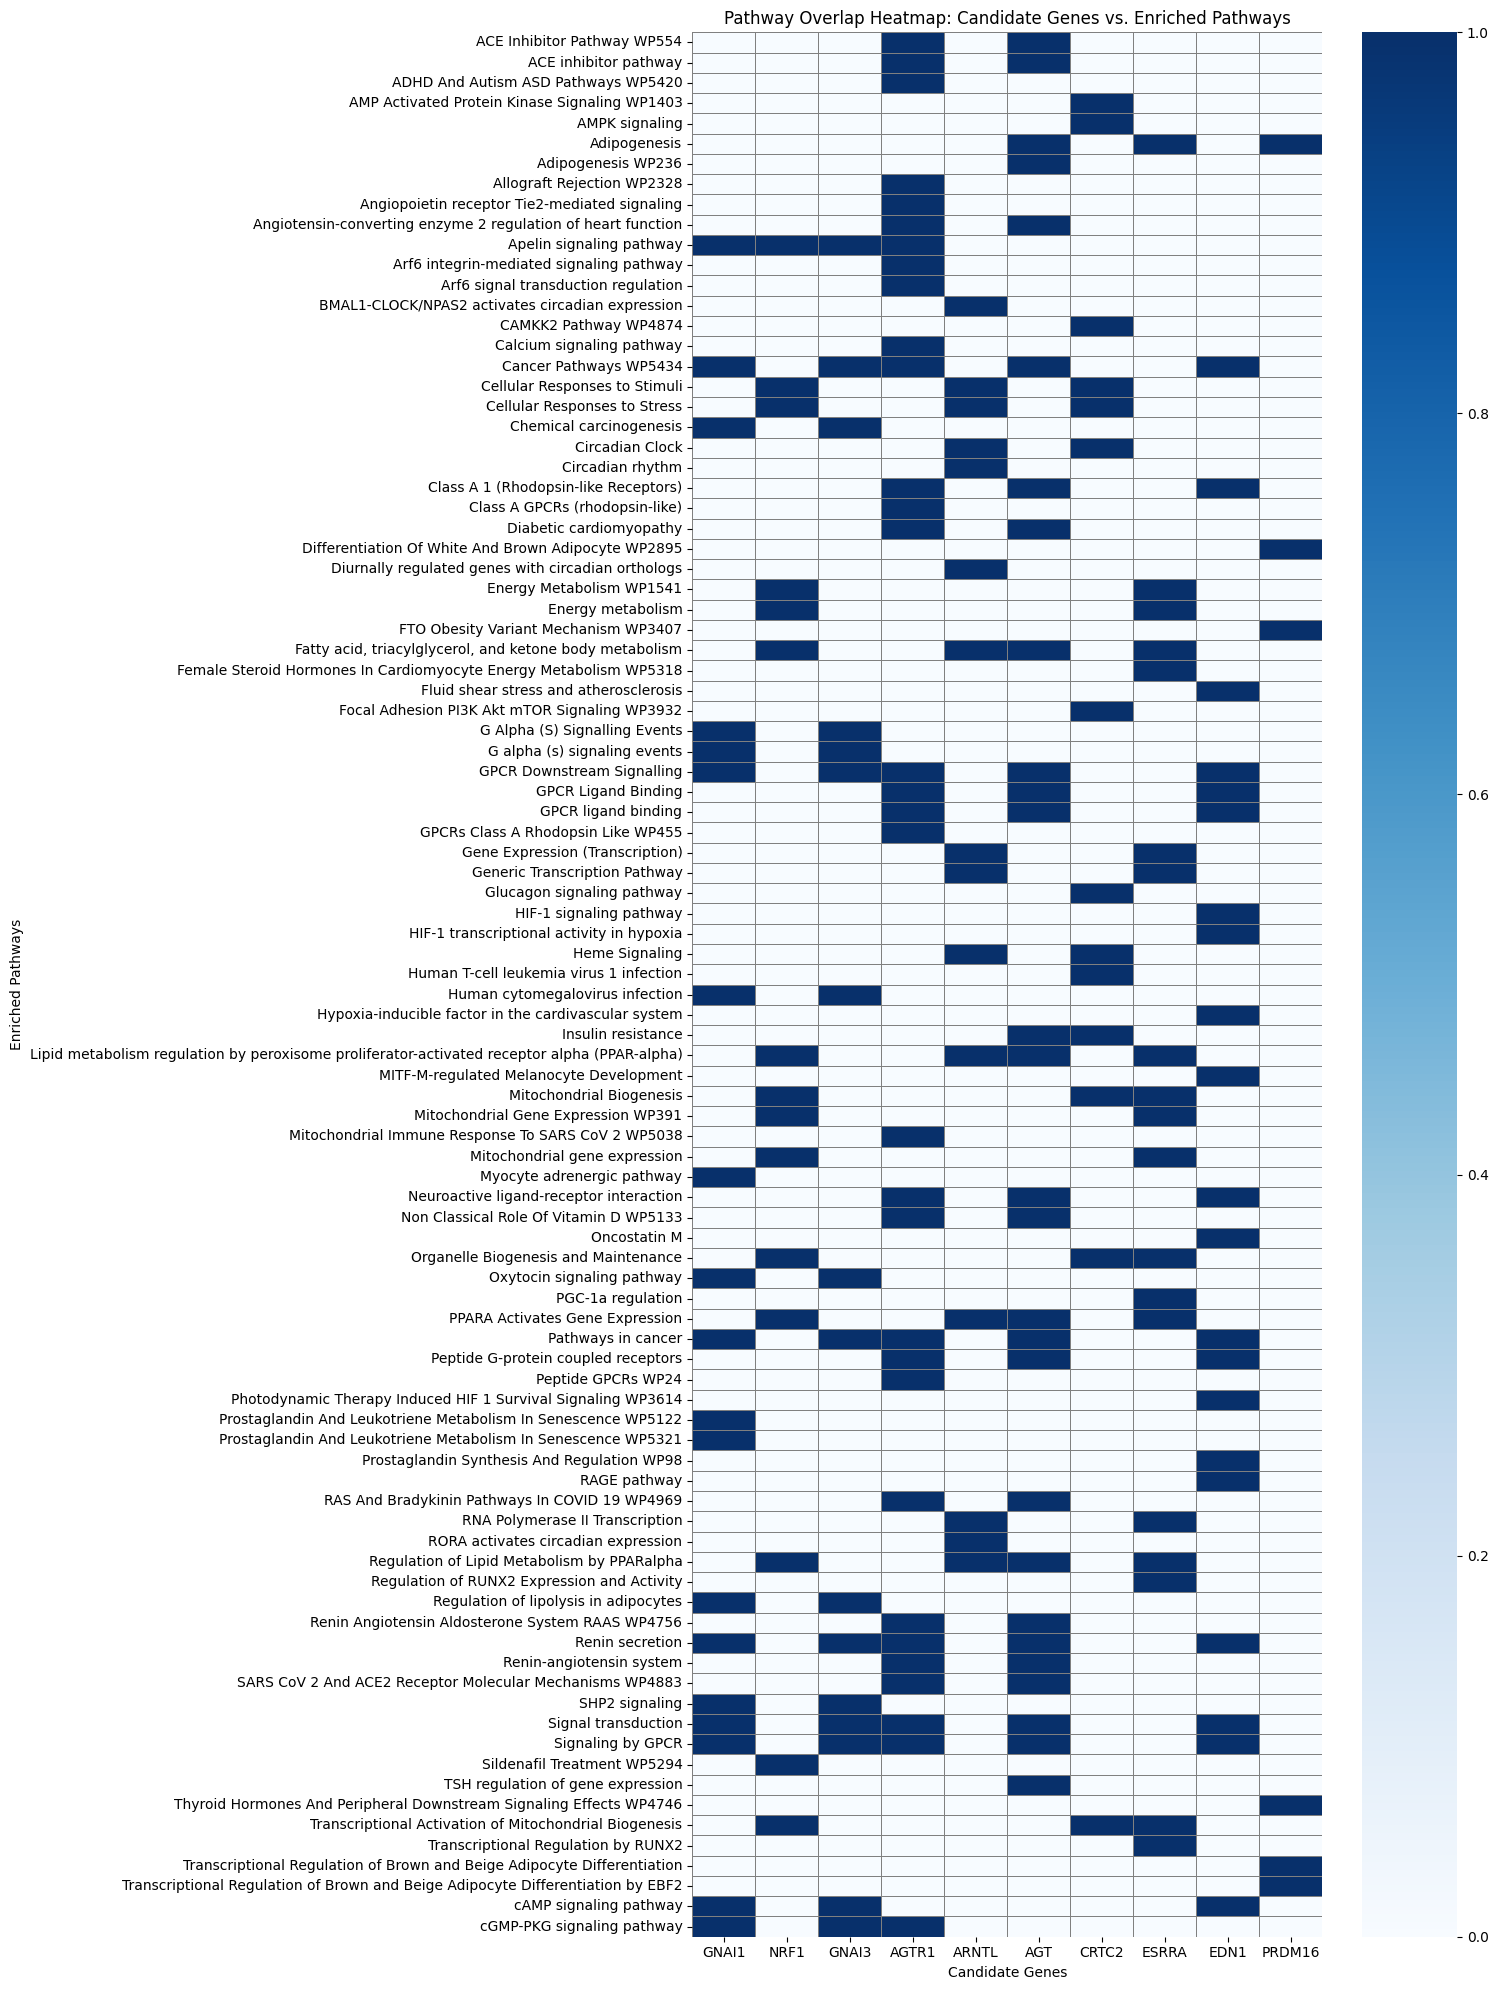

Pathway overlap summary (number of pathways with N candidate genes):
Gene_Count
5     6
4     5
3    13
2    26
1    44
Name: count, dtype: int64


In [ ]:
# Analyze pathway overlap patterns among candidate genes
# 1. Create a binary matrix: rows = pathways, columns = genes, value = 1 if gene is in pathway
# 2. Visualize the overlap as a heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Reconstruct the gene-pathway mapping from previous results
gene_to_pathways = {}
for idx, row in results_df.iterrows():
    gene = row['Gene']
    pathways = [p.strip() for p in row['Matched_Pathways'].split(';') if p.strip()]
    gene_to_pathways[gene] = pathways

# Build a set of all unique pathways
all_pathways = set()
for pathways in gene_to_pathways.values():
    all_pathways.update(pathways)

# Create binary matrix
data = []
for pathway in sorted(all_pathways):
    row = {'Pathway': pathway}
    for gene in candidate_genes:
        row[gene] = 1 if pathway in gene_to_pathways.get(gene, []) else 0
    data.append(row)

binary_df = pd.DataFrame(data)
binary_df.set_index('Pathway', inplace=True)


print(binary_df.head())


plt.figure(figsize=(15, min(0.5*len(binary_df), 20)))
sns.heatmap(binary_df, cmap='Blues', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Pathway Overlap Heatmap: Candidate Genes vs. Enriched Pathways')
plt.xlabel('Candidate Genes')
plt.ylabel('Enriched Pathways')
plt.tight_layout()
plt.show()


binary_df['Gene_Count'] = binary_df.sum(axis=1)

overlap_summary = binary_df['Gene_Count'].value_counts().sort_index(ascending=False)
print('Pathway overlap summary (number of pathways with N candidate genes):')
print(overlap_summary)

Power set

In [ ]:

import pandas as pd


power_file_path = "/content/pow wshared all db.csv"
power_df = pd.read_csv(power_file_path)


sig_power_df = power_df[power_df["Adjusted P-value"] < 0.05].sort_values(by="Adjusted P-value")


sig_power_df.reset_index(drop=True)


Gene_set  \
0    WikiPathways_2024_Human   
1             BioPlanet_2019   
2    WikiPathways_2024_Human   
3             BioPlanet_2019   
4             BioPlanet_2019   
..                       ...   
211   Reactome_Pathways_2024   
212  WikiPathways_2024_Human   
213  WikiPathways_2024_Human   
214  WikiPathways_2024_Human   
215  WikiPathways_2024_Human   

                                                  Term Overlap       P-value  \
0                                   Adipogenesis WP236   8/131  2.672009e-10   
1                                         Adipogenesis   8/133  3.017273e-10   
2                          ACE Inhibitor Pathway WP554    4/17  3.918283e-08   
3                                ACE inhibitor pathway    4/17  3.918283e-08   
4                           Fibroblast growth factor 1    4/26  2.427881e-07   
..                                                 ...     ...           ...   
211               Organelle Biogenesis and Maintenance   4/297  3.421894e-03   
212               Retinoblastoma Gene In Cancer WP2446    2/87  1.438774e-02   
213  miRNA Targeting Cancer Growth And Vascularizat...     1/7  1.460976e-02   
214             GLP 1 In Pancreatic Islet Cells WP5447     1/7  1.460976e-02   
215                     Orexin Receptor Pathway WP5094    2/88  1.470293e-02   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        7.214423e-08            0                     0   37.943568   
1        1.056045e-07            0                     0   37.332706   
2        5.289681e-06            0                     0  161.497976   
3        6.856994e-06            0                     0  161.497976   
4        2.832528e-05            0                     0   95.387560   
..                ...          ...                   ...         ...   
211      4.961746e-02            0                     0    7.064846   
212      4.962238e-02            0                     0   11.690000   
213      4.962238e-02            0                     0   81.105691   
214      4.962238e-02            0                     0   81.105691   
215      4.962238e-02            0                     0   11.553488   

     Combined Score                                        Genes  
0        836.390838  CNTFR;IL6;CDKN1A;PPARG;IGF1;PPARA;HIF1A;AGT  
1        818.388820  CNTFR;IL6;CDKN1A;PPARG;IGF1;PPARA;HIF1A;AGT  
2       2754.352386                           ACE;NOS3;AGTR2;AGT  
3       2754.352386                           ACE;NOS3;AGTR2;AGT  
4       1452.855235                       CDKN1A;IGF2;PPARG;IGF1  
..              ...                                          ...  
211       40.111097                        CCT3;CRTC1;PPARA;SOD2  
212       49.581719                                  CDKN1A;E2F3  
213      342.757942                                        HIF1A  
214      342.757942                                          IL6  
215       48.752354                                    IL6;HIF1A  

[216 rows x 10 columns]

In [ ]:

all_sig_pathways = sig_power_df[[
    "Gene_set", "Term", "Adjusted P-value", "Genes"
]].reset_index(drop=True)


all_sig_pathways


Gene_set  \
0    WikiPathways_2024_Human   
1             BioPlanet_2019   
2    WikiPathways_2024_Human   
3             BioPlanet_2019   
4             BioPlanet_2019   
..                       ...   
211   Reactome_Pathways_2024   
212  WikiPathways_2024_Human   
213  WikiPathways_2024_Human   
214  WikiPathways_2024_Human   
215  WikiPathways_2024_Human   

                                                  Term  Adjusted P-value  \
0                                   Adipogenesis WP236      7.214423e-08   
1                                         Adipogenesis      1.056045e-07   
2                          ACE Inhibitor Pathway WP554      5.289681e-06   
3                                ACE inhibitor pathway      6.856994e-06   
4                           Fibroblast growth factor 1      2.832528e-05   
..                                                 ...               ...   
211               Organelle Biogenesis and Maintenance      4.961746e-02   
212               Retinoblastoma Gene In Cancer WP2446      4.962238e-02   
213  miRNA Targeting Cancer Growth And Vascularizat...      4.962238e-02   
214             GLP 1 In Pancreatic Islet Cells WP5447      4.962238e-02   
215                     Orexin Receptor Pathway WP5094      4.962238e-02   

                                           Genes  
0    CNTFR;IL6;CDKN1A;PPARG;IGF1;PPARA;HIF1A;AGT  
1    CNTFR;IL6;CDKN1A;PPARG;IGF1;PPARA;HIF1A;AGT  
2                             ACE;NOS3;AGTR2;AGT  
3                             ACE;NOS3;AGTR2;AGT  
4                         CDKN1A;IGF2;PPARG;IGF1  
..                                           ...  
211                        CCT3;CRTC1;PPARA;SOD2  
212                                  CDKN1A;E2F3  
213                                        HIF1A  
214                                          IL6  
215                                    IL6;HIF1A  

[216 rows x 4 columns]

In [ ]:
import re

# Define functional themes with associated keyword patterns
themes = {
    "Metabolism": ["metabolism", "adipogenesis", "lipid", "fat", "glucose", "insulin", "ppar", "energy"],
    "Inflammation / Immune Response": ["inflamm", "immune", "cytokine", "interleukin", "tnf", "jak", "stat", "nf-kb"],
    "Muscle Structure / Growth": ["muscle", "myogenesis", "myoblast", "actin", "hypertrophy", "ckm", "actn3", "igf"],
    "Vascular / Cardiovascular": ["vascular", "angiogenesis", "angiotensin", "ace", "blood", "endothelium", "vasculature"],
    "Stress / Apoptosis / Oxidative": ["apoptosis", "oxidative", "stress", "sod", "hif", "hypoxia", "senescence"],
    "Hormonal Signaling": ["hormone", "androgen", "estrogen", "insulin", "gh", "leptin", "thyroid"],
    "Signal Transduction": ["signaling", "pathway", "receptor", "mapk", "pi3k", "akt", "ras"],
    "Cancer / Cell Cycle": ["cancer", "tumor", "cell cycle", "proliferation", "e2f", "rb", "p53"]
}


def assign_theme(term):
    for theme, keywords in themes.items():
        for kw in keywords:
            if re.search(kw, term, re.IGNORECASE):
                return theme
    return "Other / Unclassified"


all_sig_pathways["Functional Theme"] = all_sig_pathways["Term"].apply(assign_theme)


theme_counts = all_sig_pathways["Functional Theme"].value_counts()


grouped_by_theme = all_sig_pathways.groupby("Functional Theme").apply(lambda df: df[["Term", "Gene_set", "Adjusted P-value", "Genes"]].reset_index(drop=True))

theme_counts, grouped_by_theme


<ipython-input-3-4cf134c70fa2>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_by_theme = all_sig_pathways.groupby("Functional Theme").apply(lambda df: df[["Term", "Gene_set", "Adjusted P-value", "Genes"]].reset_index(drop=True))


(Functional Theme
 Other / Unclassified              62
 Signal Transduction               50
 Metabolism                        32
 Inflammation / Immune Response    22
 Vascular / Cardiovascular         18
 Cancer / Cell Cycle               16
 Stress / Apoptosis / Oxidative     8
 Muscle Structure / Growth          6
 Hormonal Signaling                 2
 Name: count, dtype: int64,
                                                                            Term  \
 Functional Theme                                                                  
 Cancer / Cell Cycle       0             Transcriptional misregulation in cancer   
                           1    Pathophysiological Roles Of DUX4 In FSHD1 WP5342   
                           2                             Proteoglycans in cancer   
                           3   Aberrant Regulation of Mitotic G1 S Transition...   
                           4   Defective Binding of RB1 Mutants to E2F1,(E2F2...   
 ...                    

Pipeline

In [ ]:
import pandas as pd
try:
  import gseapy as gp
except:
  !pip install gseapy
  import gseapy as gp
from collections import Counter, defaultdict
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Function to query STRING-db
def get_string_interactions(genes, score_threshold=0.7):
    string_api_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"

    request_url = "/".join([string_api_url, output_format, method])

    params = {
        "identifiers": "%0d".join(genes),

        "species": 9606,  # Human
        "required_score": score_threshold * 1000,
        "add_nodes": 10  # Number of additional nodes to show
    }

    response = requests.post(request_url, data=params)
    return response.json()

def find_candidate_genes(enrichment_file, string_score_threshold=0.7):

    import pandas as pd
    from collections import defaultdict

    enrichment_df = pd.read_csv(enrichment_file)


    significant_enrichment_df = enrichment_df[enrichment_df['Adjusted P-value'] < 0.05]


    gene_lists = significant_enrichment_df['Genes'].str.split(';')
    all_genes = [gene for sublist in gene_lists for gene in sublist]
    gene_counts = Counter(all_genes)

    gene_freq_df = pd.DataFrame.from_dict(gene_counts, orient='index', columns=['Frequency'])
    gene_freq_df = gene_freq_df.sort_values('Frequency', ascending=False)
    print(gene_freq_df.head(20))
    top_genes = gene_freq_df.head(20)
    seed_genes = list(top_genes.index)


    interactions = get_string_interactions(seed_genes, string_score_threshold)

    new_genes = set()
    for interaction in interactions:
        if 'preferredName_A' in interaction:
            gene_a = interaction['preferredName_A']
            gene_b = interaction['preferredName_B']
            if gene_a not in seed_genes:
                new_genes.add(gene_a)
            if gene_b not in seed_genes:
                new_genes.add(gene_b)

    gene_scores = {}
    for interaction in interactions:
        if 'preferredName_A' in interaction:
            gene_a = interaction['preferredName_A']
            gene_b = interaction['preferredName_B']
            score = float(interaction['score'])

            if gene_a not in seed_genes:
                if gene_a not in gene_scores:
                    gene_scores[gene_a] = []
                gene_scores[gene_a].append(score)

            if gene_b not in seed_genes:
                if gene_b not in gene_scores:
                    gene_scores[gene_b] = []
                gene_scores[gene_b].append(score)

    avg_scores = {gene: sum(scores)/len(scores) for gene, scores in gene_scores.items()}


    sorted_genes = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)

    print("Top related genes not in your dataset (with average interaction scores):")
    for gene, score in sorted_genes:
        print(f"{gene}: {score:.3f}")

    print("\
    Total number of new related genes found:", len(sorted_genes))
    gene_names = [gene for gene, score in sorted_genes]
    print(gene_names)

    enrichment_df = pd.read_csv('end wshared all db.csv')
    candidate_genes = gene_names
    significant_enrichment_df = enrichment_df[enrichment_df['Adjusted P-value'] < 0.05]

    print(significant_enrichment_df)
    print(candidate_genes[:10])



    enriched_pathways = set(significant_enrichment_df['Term'])


    gene_to_matched_pathways = defaultdict(list)

    # Query KEGG, Reactome, WikiPathways for each gene
    for gene in candidate_genes:
        # KEGG
        try:
            kegg = gp.get_library_name(organism='Human')
            if 'KEGG_2021_Human' in kegg:
                kegg_pathways = gp.get_library('KEGG_2021_Human')
                for pathway, genes in kegg_pathways.items():
                    if gene in genes and pathway in enriched_pathways:
                        gene_to_matched_pathways[gene].append(pathway)
        except Exception as e:
            print('KEGG error for', gene, e)
        # Reactome
        try:
            reactome = gp.get_library_name(organism='Human')
            if 'Reactome_Pathways_2024' in reactome:
                reactome_pathways = gp.get_library('Reactome_Pathways_2024')
                for pathway, genes in reactome_pathways.items():
                    if gene in genes and pathway in enriched_pathways:
                        gene_to_matched_pathways[gene].append(pathway)
        except Exception as e:
            print('Reactome error for', gene, e)
        # WikiPathways
        try:
            wikipathways = gp.get_library_name(organism='Human')
            if 'WikiPathways_2024_Human' in wikipathways:
                wiki_pathways = gp.get_library('WikiPathways_2024_Human')
                for pathway, genes in wiki_pathways.items():
                    if gene in genes and pathway in enriched_pathways:
                        gene_to_matched_pathways[gene].append(pathway)
        except Exception as e:
            print('WikiPathways error for', gene, e)
        #MsigDB
        try:
            msig = gp.get_library_name(organism='Human')
            if 'MSigDB_Hallmark_2020' in msig:
                msig_pathways = gp.get_library('MSigDB_Hallmark_2020')
                for pathway, genes in msig_pathways.items():
                    if gene in genes and pathway in enriched_pathways:
                        gene_to_matched_pathways[gene].append(pathway)
        except Exception as e:
            print('MSigDB_Hallmark_2020 error for', gene, e)
        #BioPlanet_2019
        try:
            bioplanet = gp.get_library_name(organism='Human')
            if 'BioPlanet_2019' in bioplanet:
                bioplanet_pathways = gp.get_library('BioPlanet_2019')
                for pathway, genes in bioplanet_pathways.items():
                    if gene in genes and pathway in enriched_pathways:
                        gene_to_matched_pathways[gene].append(pathway)
        except Exception as e:
            print('BioPlanet_2019 error for', gene, e)


    import pandas as pd
    results_df = pd.DataFrame([
        {'Gene': gene, 'Matched_Pathways': '; '.join(paths) if paths else ''}
        for gene, paths in gene_to_matched_pathways.items()
    ])

    print(results_df.head())


    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from collections import defaultdict

    # Reconstruct the gene-pathway mapping from previous results
    gene_to_pathways = {}
    for idx, row in results_df.iterrows():
        gene = row['Gene']
        pathways = [p.strip() for p in row['Matched_Pathways'].split(';') if p.strip()]
        gene_to_pathways[gene] = pathways

    # Build a set of all unique pathways
    all_pathways = set()
    for pathways in gene_to_pathways.values():
        all_pathways.update(pathways)

    # Create binary matrix
    data = []
    for pathway in sorted(all_pathways):
        row = {'Pathway': pathway}
        for gene in candidate_genes:
            row[gene] = 1 if pathway in gene_to_pathways.get(gene, []) else 0
        data.append(row)

    binary_df = pd.DataFrame(data)
    binary_df.set_index('Pathway', inplace=True)


    print(binary_df.head())


    plt.figure(figsize=(15, min(0.5*len(binary_df), 20)))
    sns.heatmap(binary_df, cmap='Blues', cbar=True, linewidths=0.5, linecolor='gray')
    plt.title('Pathway Overlap Heatmap: Candidate Genes vs. Enriched Pathways')
    plt.xlabel('Candidate Genes')
    plt.ylabel('Enriched Pathways')
    plt.tight_layout()
    plt.show()


    binary_df['Gene_Count'] = binary_df.sum(axis=1)

    overlap_summary = binary_df['Gene_Count'].value_counts().sort_index(ascending=False)
    print('Pathway overlap summary (number of pathways with N candidate genes):')
    print(overlap_summary)
    return results_df


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 10.0 MB/s eta 0:00:00


Top related genes not in your dataset (with average interaction scores):
GNAI1: 0.933
NRF1: 0.930
GNAI3: 0.928
AGTR1: 0.926
ARNTL: 0.902
AGT: 0.900
CRTC2: 0.883
ESRRA: 0.875
EDN1: 0.867
PRDM16: 0.847
    Total number of new related genes found: 10
['GNAI1', 'NRF1', 'GNAI3', 'AGTR1', 'ARNTL', 'AGT', 'CRTC2', 'ESRRA', 'EDN1', 'PRDM16']
                    Gene_set  \
0       MSigDB_Hallmark_2020   
1       MSigDB_Hallmark_2020   
24           KEGG_2021_Human   
25           KEGG_2021_Human   
26           KEGG_2021_Human   
..                       ...   
766  WikiPathways_2024_Human   
767  WikiPathways_2024_Human   
768  WikiPathways_2024_Human   
769  WikiPathways_2024_Human   
770  WikiPathways_2024_Human   

                                                  Term Overlap       P-value  \
0                                           Myogenesis   6/200  1.961586e-06   
1                                              Hypoxia   4/200  5.488816e-04   
24                                     

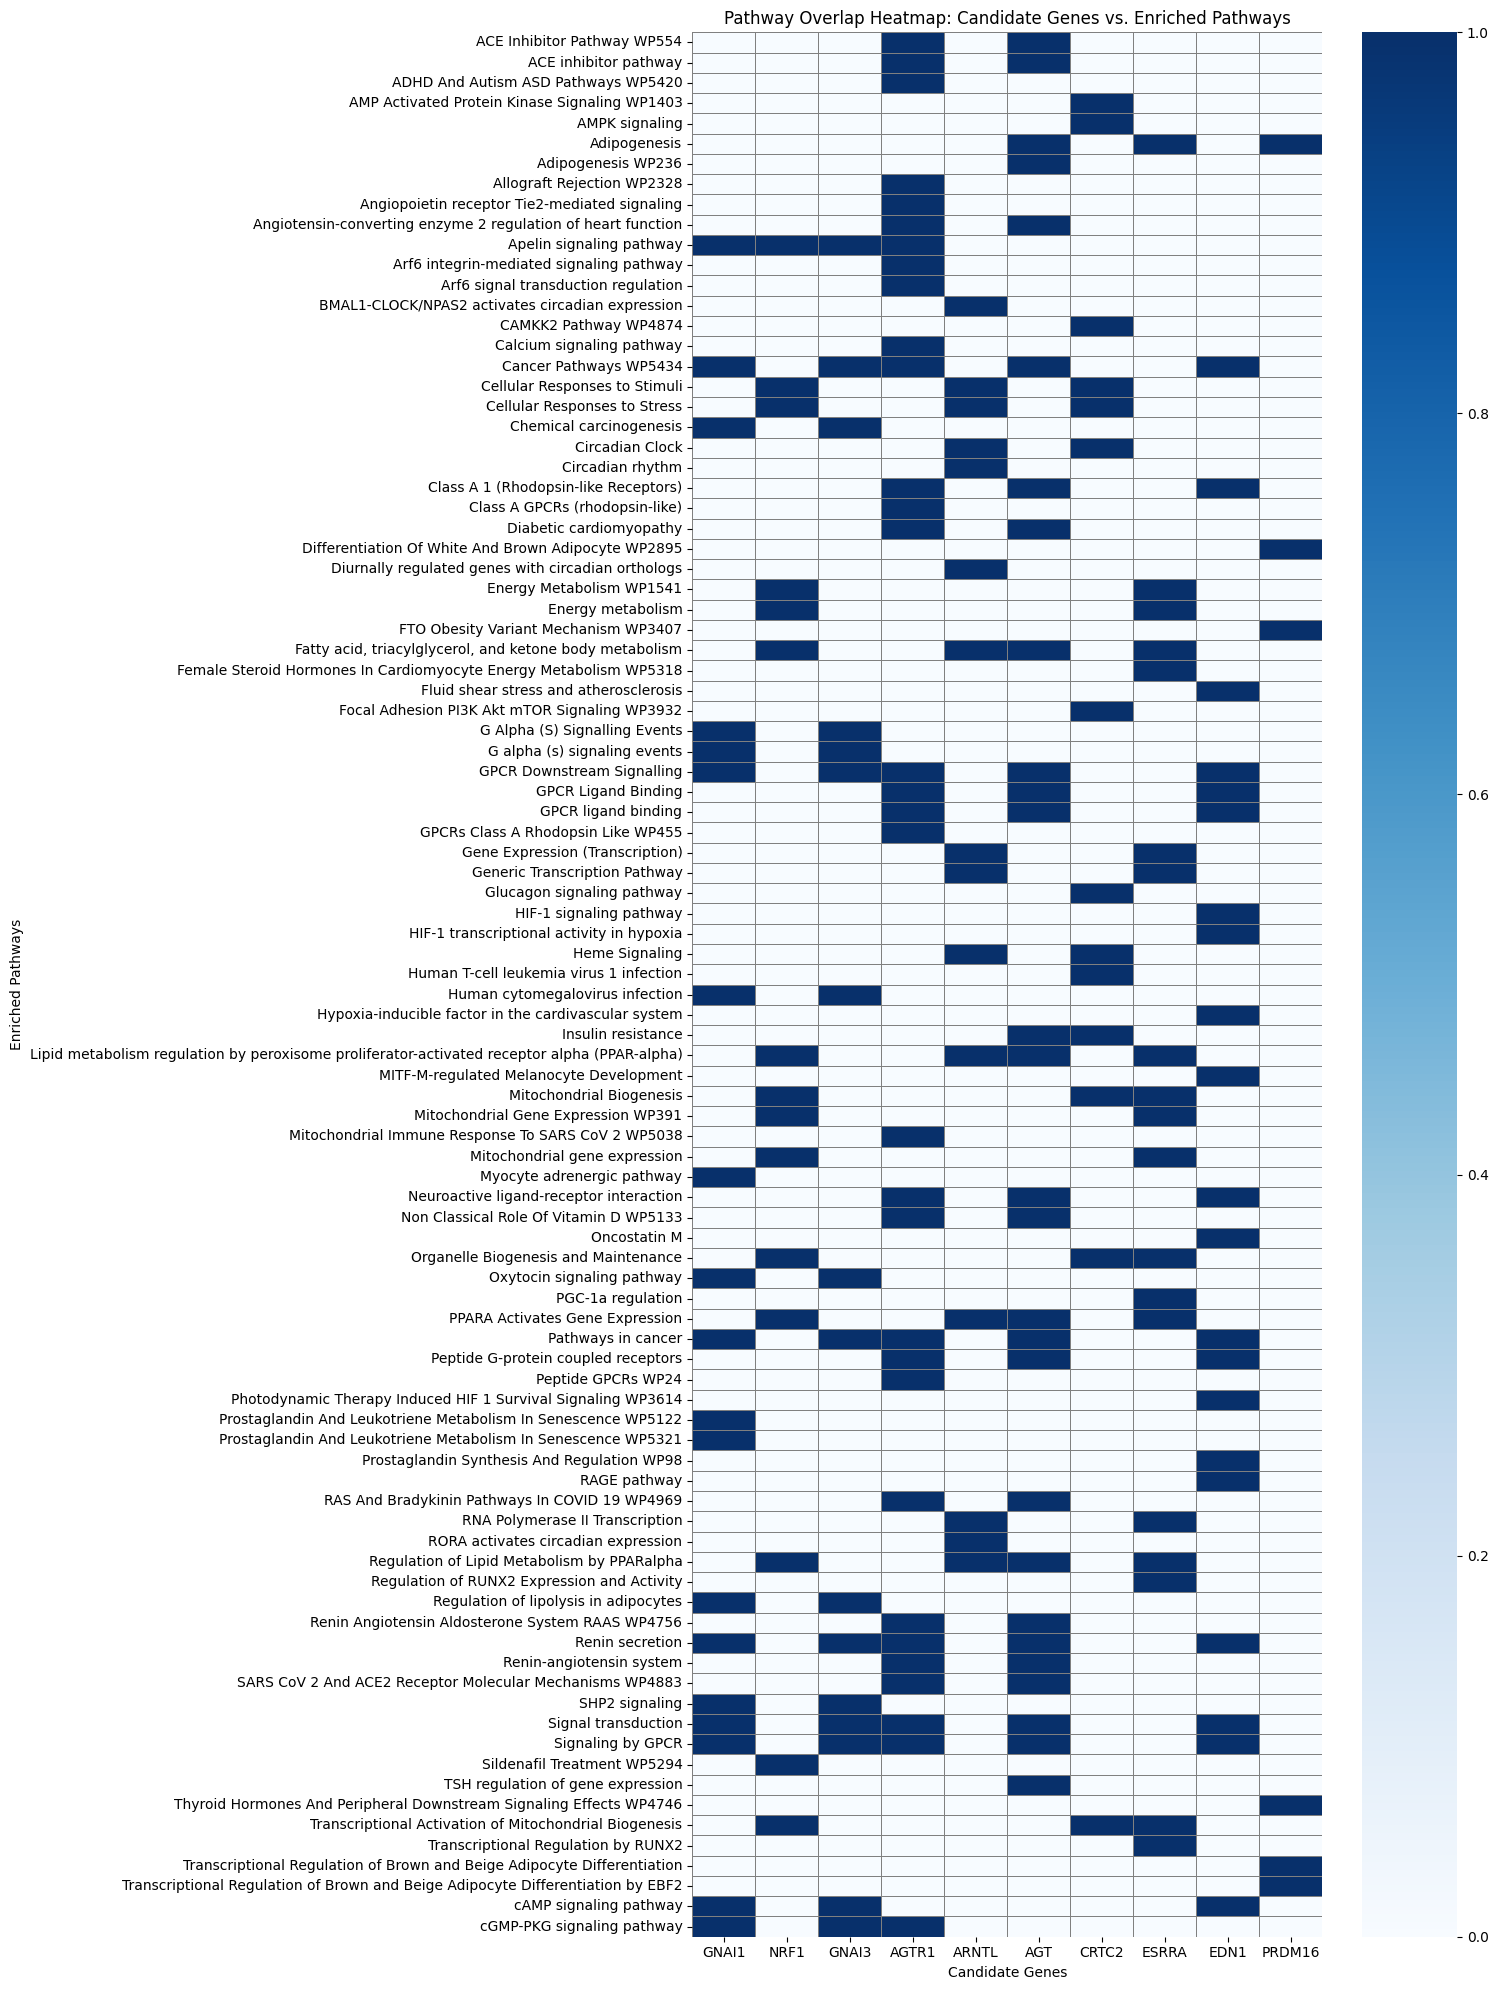

Pathway overlap summary (number of pathways with N candidate genes):
Gene_Count
5     6
4     5
3    13
2    26
1    44
Name: count, dtype: int64


Gene                                   Matched_Pathways
0   GNAI1  Apelin signaling pathway; Chemical carcinogene...
1    NRF1  Apelin signaling pathway; Cellular Responses t...
2   GNAI3  Apelin signaling pathway; Chemical carcinogene...
3   AGTR1  Apelin signaling pathway; Calcium signaling pa...
4   ARNTL  Circadian rhythm; Cellular Responses to Stimul...
5     AGT  Diabetic cardiomyopathy; Insulin resistance; N...
6   CRTC2  Glucagon signaling pathway; Human T-cell leuke...
7   ESRRA  Gene Expression (Transcription); Generic Trans...
8    EDN1  Fluid shear stress and atherosclerosis; HIF-1 ...
9  PRDM16  Adipogenesis; Transcriptional Regulation of Br...

In [ ]:
find_candidate_genes('end wshared all db.csv')

        Frequency
IL6            81
CDKN1A         80
IGF1           55
PPARG          46
HIF1A          43
AGT            41
E2F3           40
PPARA          38
NOS3           34
SOD2           30
IGF2           23
ACE            21
AGTR2          18
BDNF           15
ADRB2          15
MTHFR          12
CNTFR          11
FHL2           10
CRTC1           9
ACVR1B          7
Top related genes not in your dataset (with average interaction scores):
IGFBP4: 0.996
AGTR1: 0.916
BDKRB2: 0.910
CNTF: 0.902
EDN1: 0.858
REN: 0.854
SIRT1: 0.839
LEP: 0.838
MMP9: 0.798
MAS1L: 0.771
    Total number of new related genes found: 10
['IGFBP4', 'AGTR1', 'BDKRB2', 'CNTF', 'EDN1', 'REN', 'SIRT1', 'LEP', 'MMP9', 'MAS1L']
                    Gene_set  \
0       MSigDB_Hallmark_2020   
1       MSigDB_Hallmark_2020   
24           KEGG_2021_Human   
25           KEGG_2021_Human   
26           KEGG_2021_Human   
..                       ...   
766  WikiPathways_2024_Human   
767  WikiPathways_2024_Human   
76

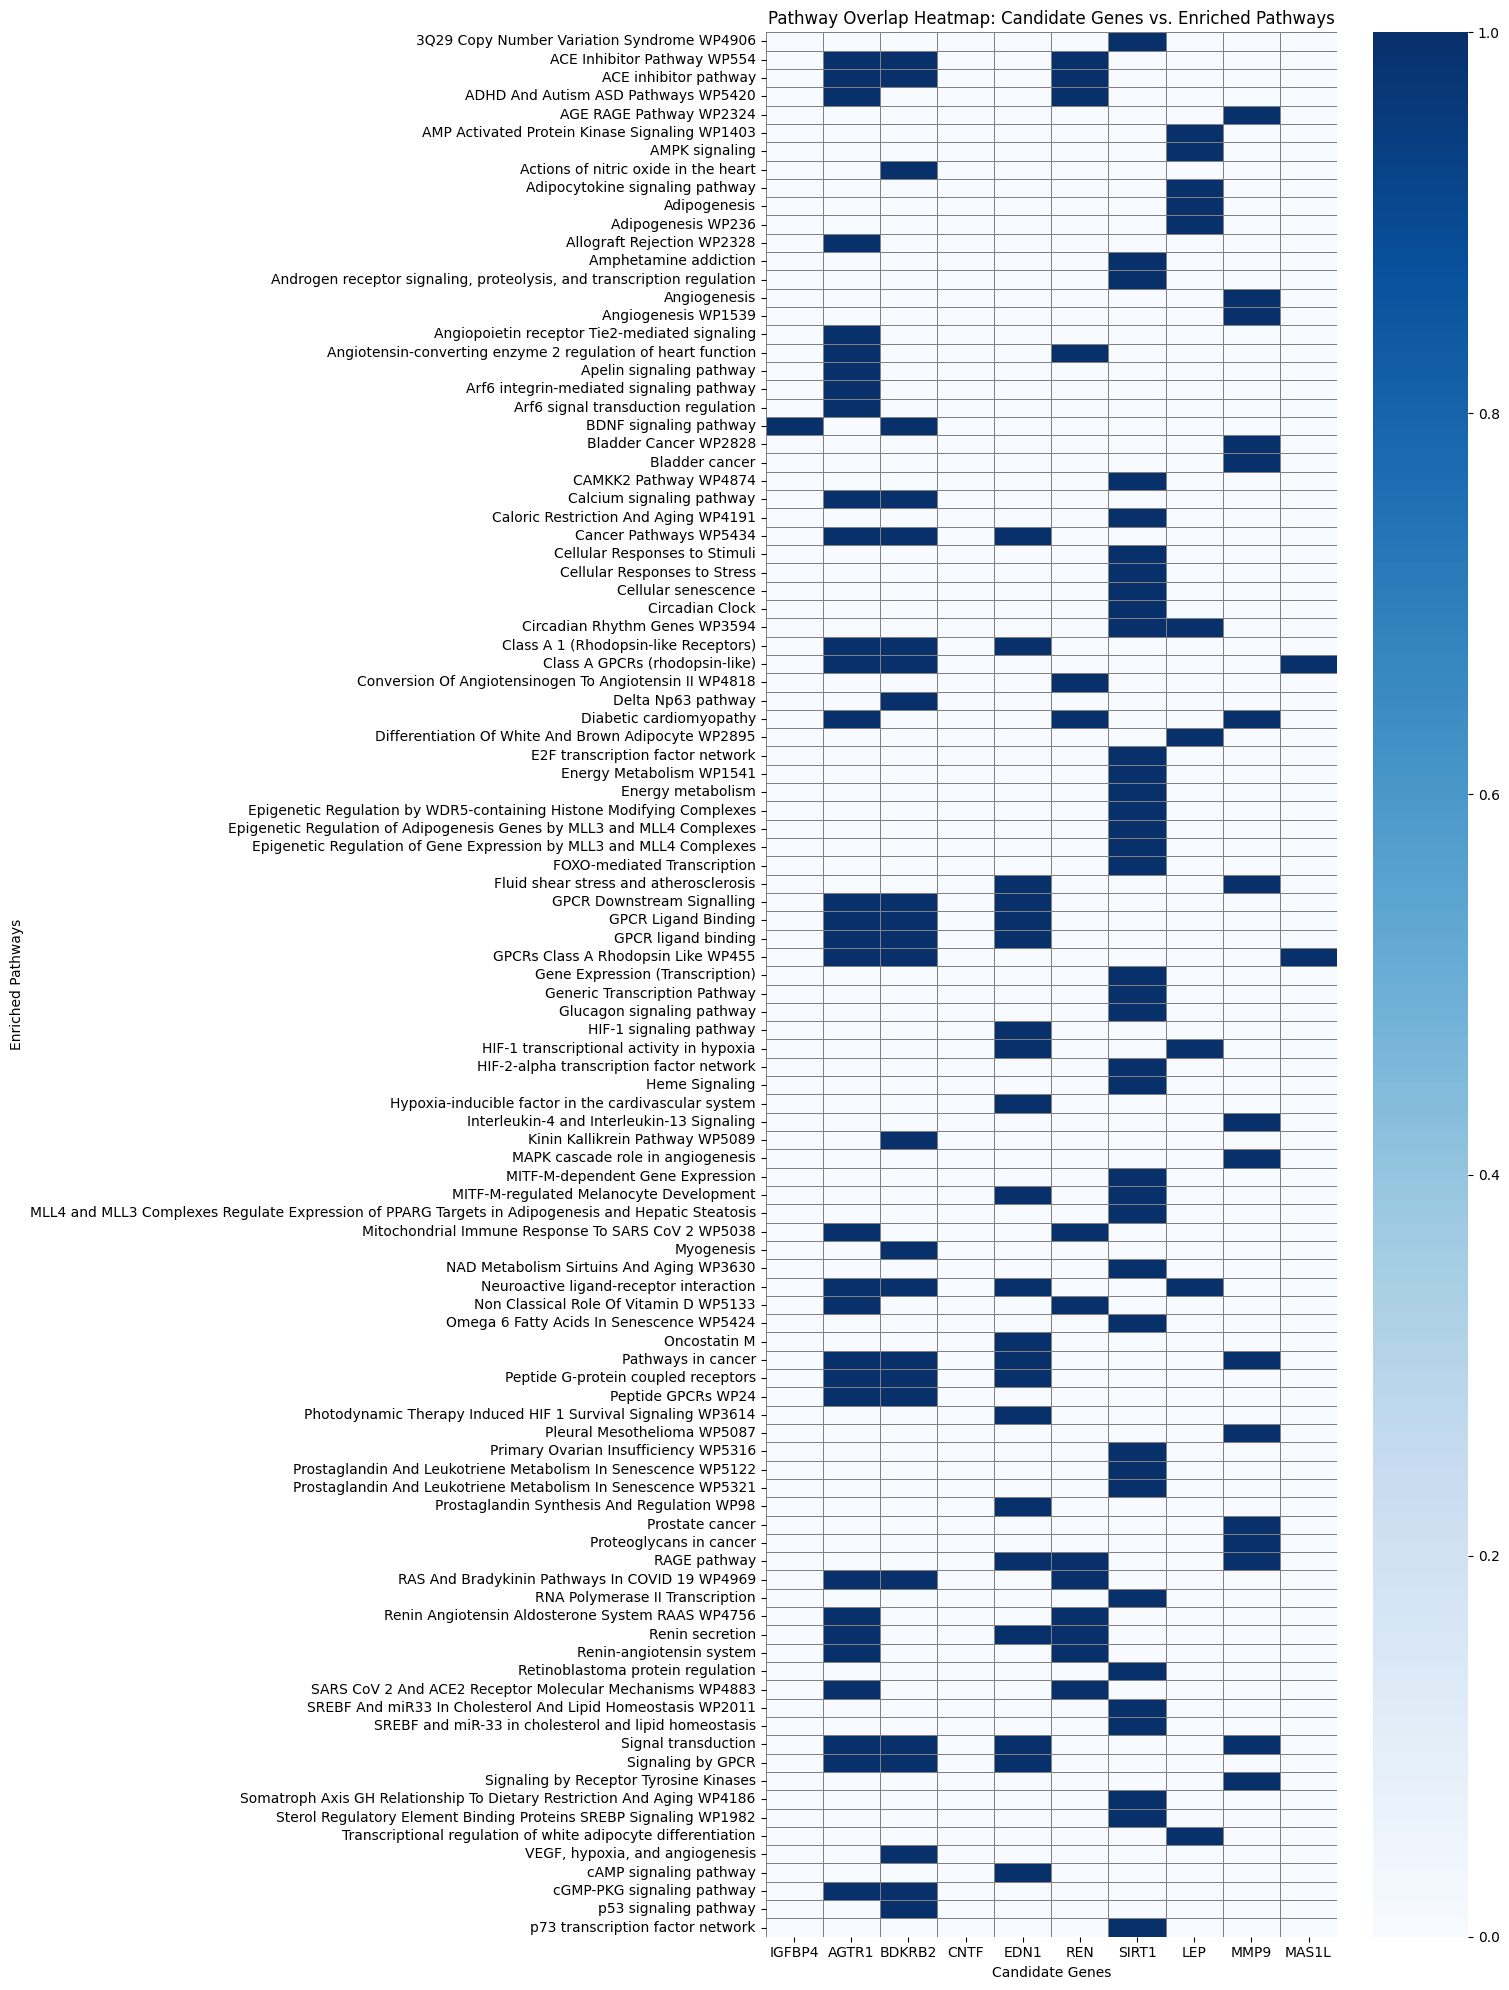

Pathway overlap summary (number of pathways with N candidate genes):
Gene_Count
4     3
3    15
2    15
1    71
Name: count, dtype: int64


Gene                                   Matched_Pathways
0  IGFBP4                             BDNF signaling pathway
1   AGTR1  Apelin signaling pathway; Calcium signaling pa...
2  BDKRB2  Calcium signaling pathway; Neuroactive ligand-...
3    EDN1  Fluid shear stress and atherosclerosis; HIF-1 ...
4     REN  Diabetic cardiomyopathy; Renin secretion; Reni...
5   SIRT1  Amphetamine addiction; Cellular senescence; Gl...
6     LEP  Adipocytokine signaling pathway; Neuroactive l...
7    MMP9  Bladder cancer; Diabetic cardiomyopathy; Fluid...
8   MAS1L  GPCRs Class A Rhodopsin Like WP455; Class A GP...

In [ ]:
find_candidate_genes('pow wshared all db.csv')

In [ ]:
find_candidate_genes('str wshared all db.csv')
#

          Frequency
IL6              56
PPARG            53
PPARGC1A         49
PPARA            45
ADCY3            42
ITPR1            41
IGF1             40
AGT              39
ACTG1            26
HIF1A            26
ACE              19
AR               17
RASGRF1          10
ANGPT2            9
MTHFR             9
ALDH2             8
CKM               7
ACTN3             5
CNTFR             4
ADPGK             3
Top related genes not in your dataset (with average interaction scores):
NCOA1: 0.931
ADIPOQ: 0.907
NCOA2: 0.899
SIRT1: 0.885
FOXO1: 0.880
KDM3A: 0.871
LEP: 0.867
G6PC: 0.828
NRIP1: 0.823
MAS1L: 0.786
    Total number of new related genes found: 10
['NCOA1', 'ADIPOQ', 'NCOA2', 'SIRT1', 'FOXO1', 'KDM3A', 'LEP', 'G6PC', 'NRIP1', 'MAS1L']


FileNotFoundError: [Errno 2] No such file or directory: 'end wshared all db.csv'

In [ ]:
#@title testing
import pandas as pd

df = pd.read_csv("end wshared all db.csv")


cyto_df = pd.DataFrame({
    "Name": df["Term"],
    "p-value": df["P-value"],
    "FDR q-value": df["Adjusted P-value"],
    "NES": 1,
    'Genes': df['Genes'].str.replace(';', ' ', regex=False)
})


cyto_df.to_csv("cytoscape_enrichmentmap_ready.csv", index=False)


**5. Clustermap creation for visualization purposes**

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


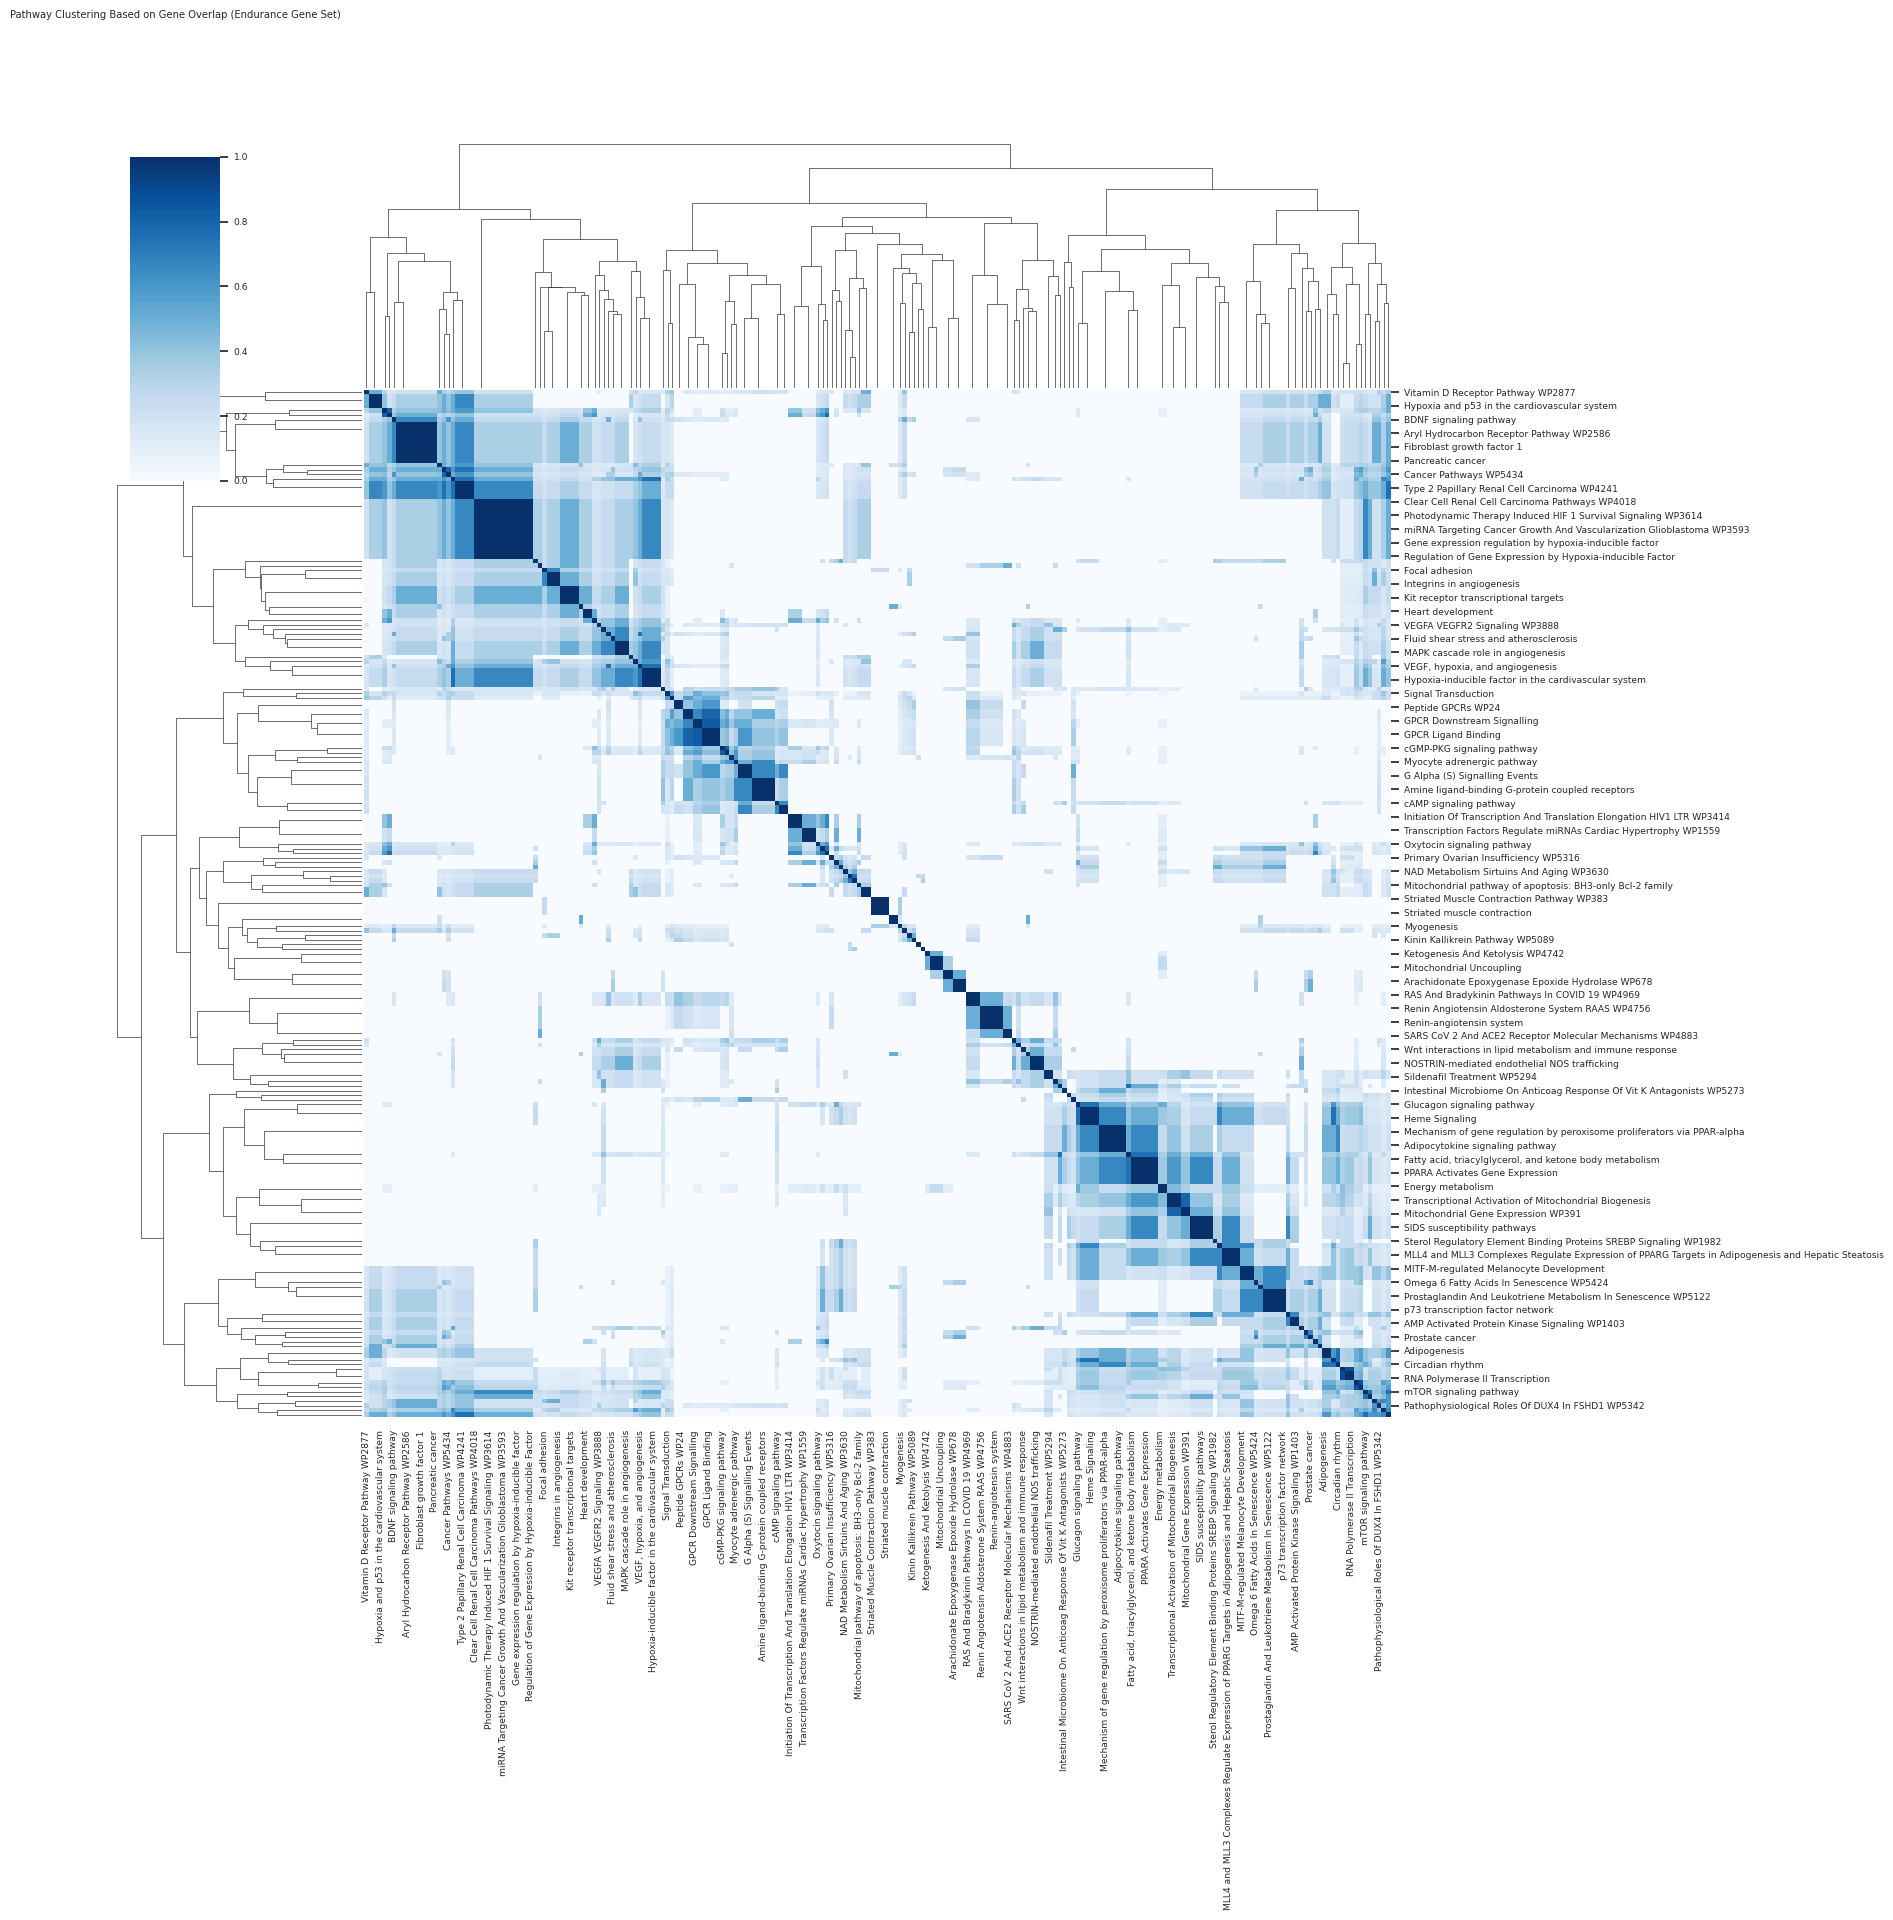

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


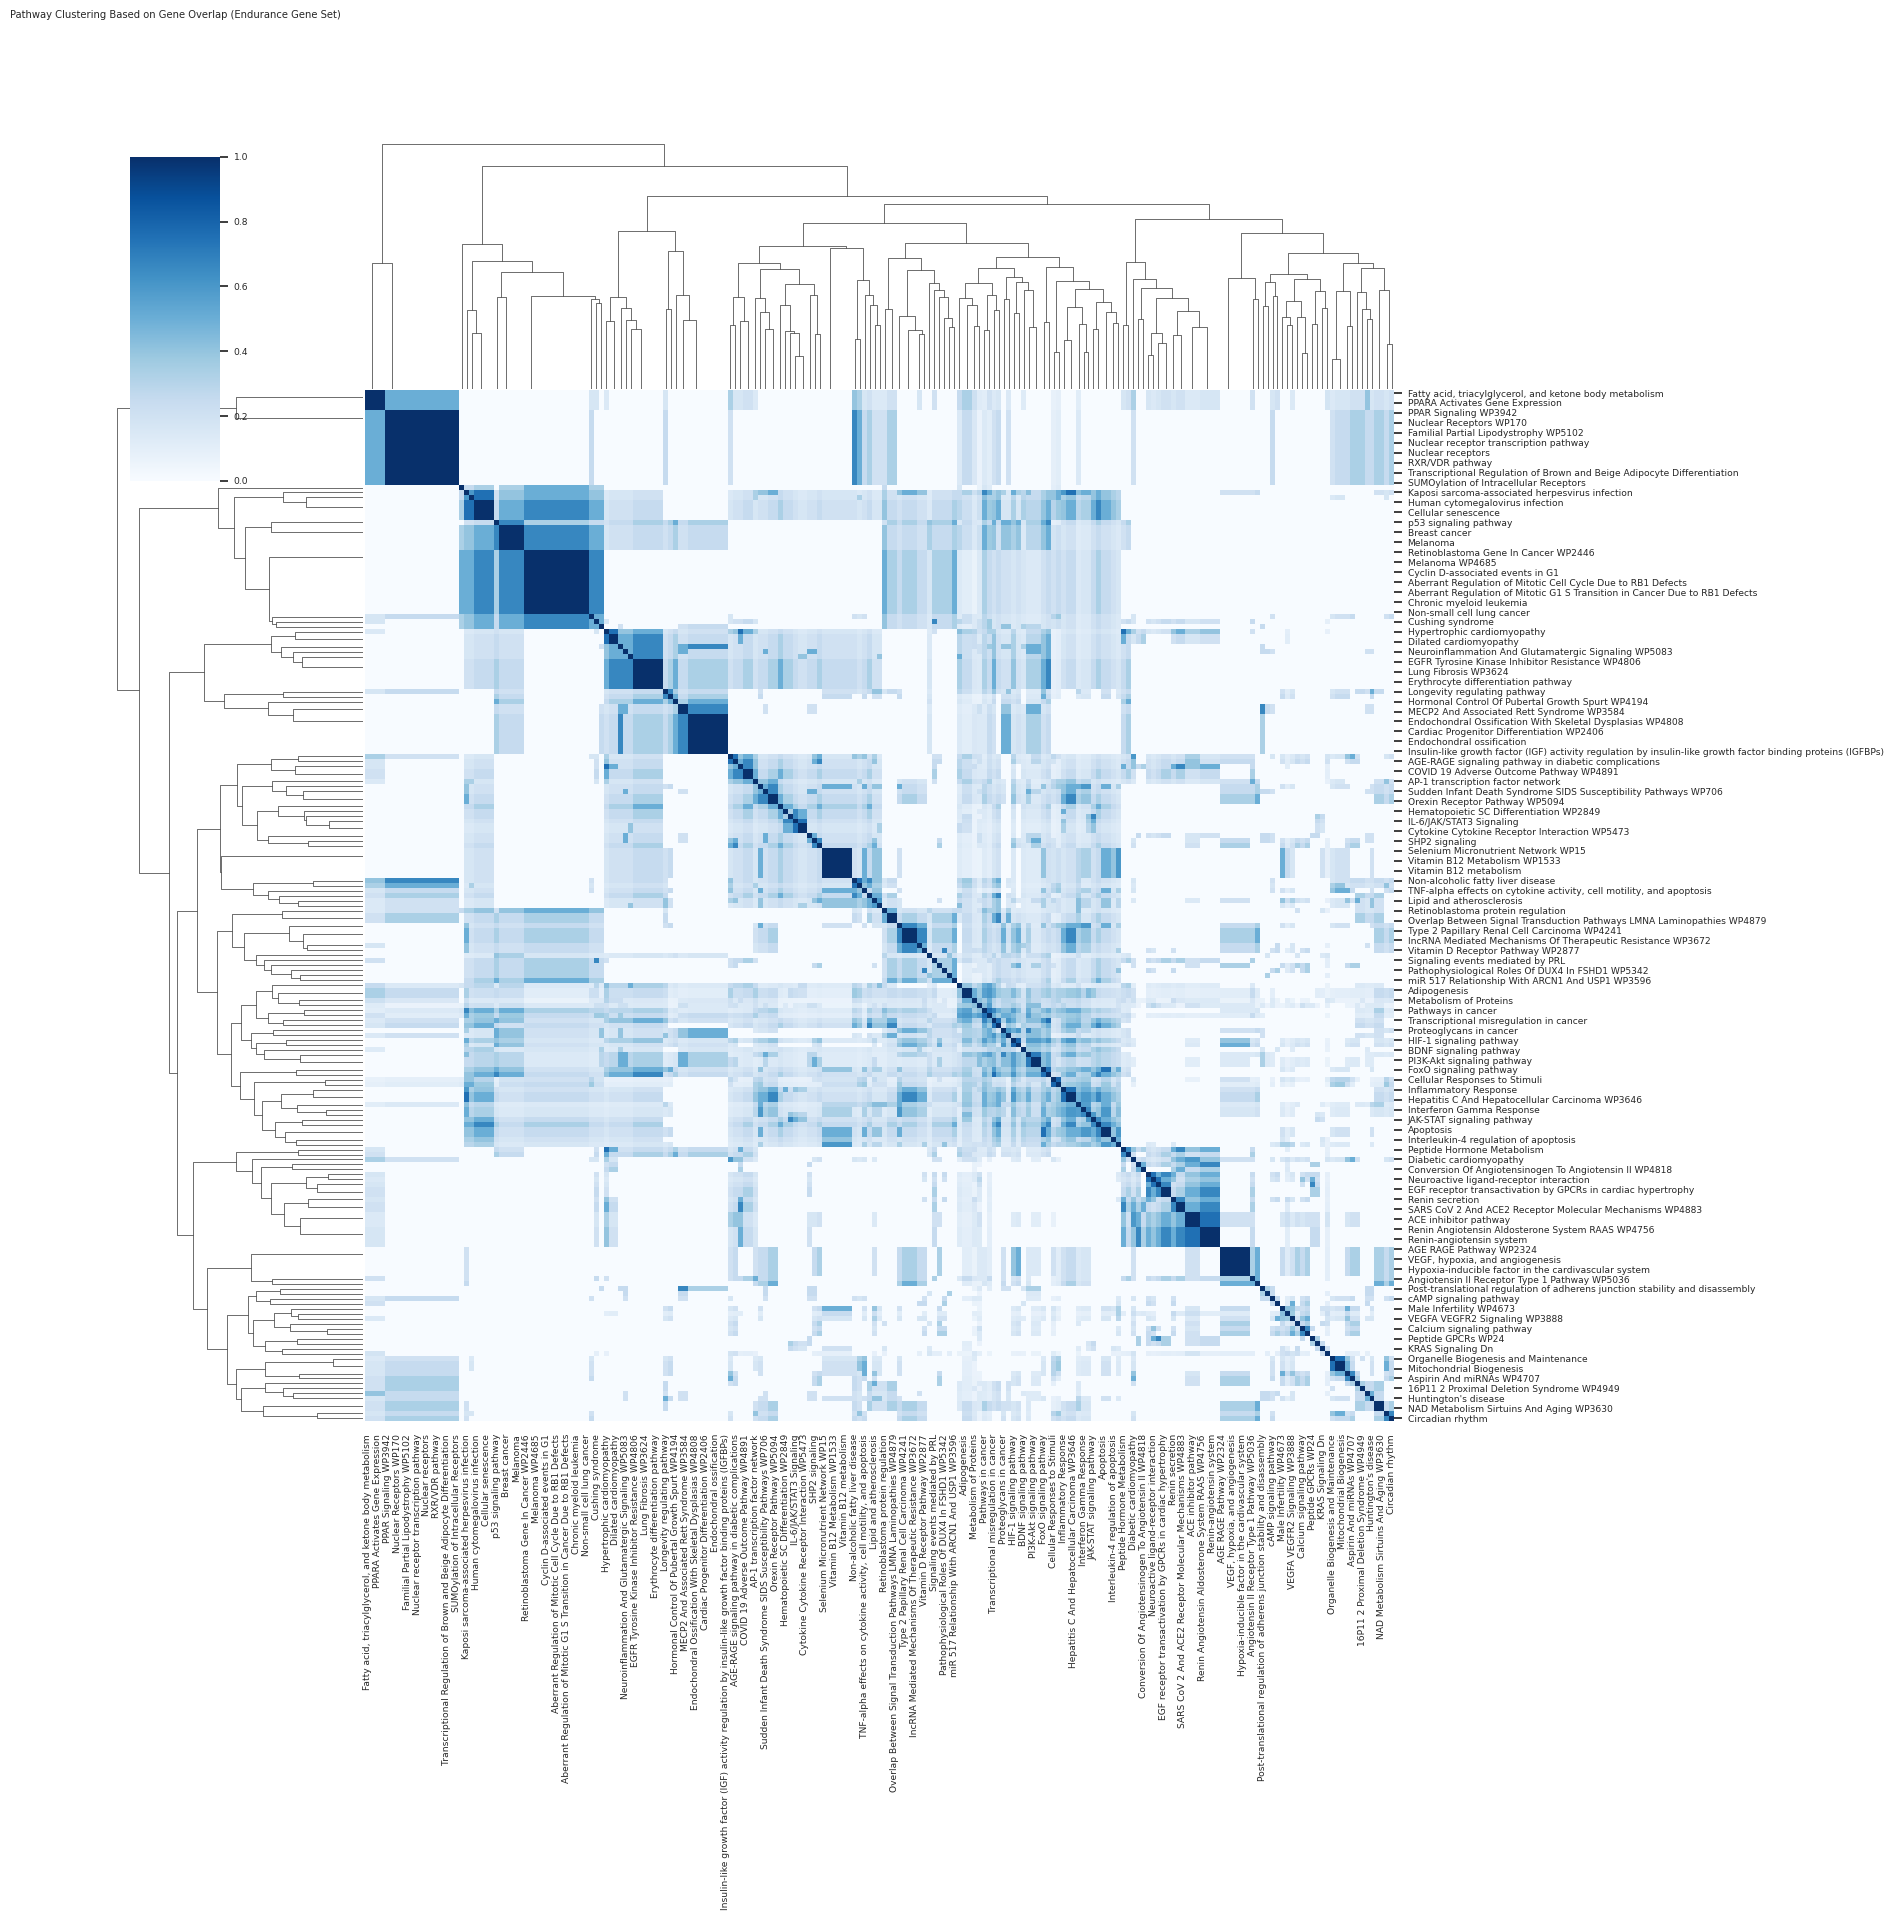

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


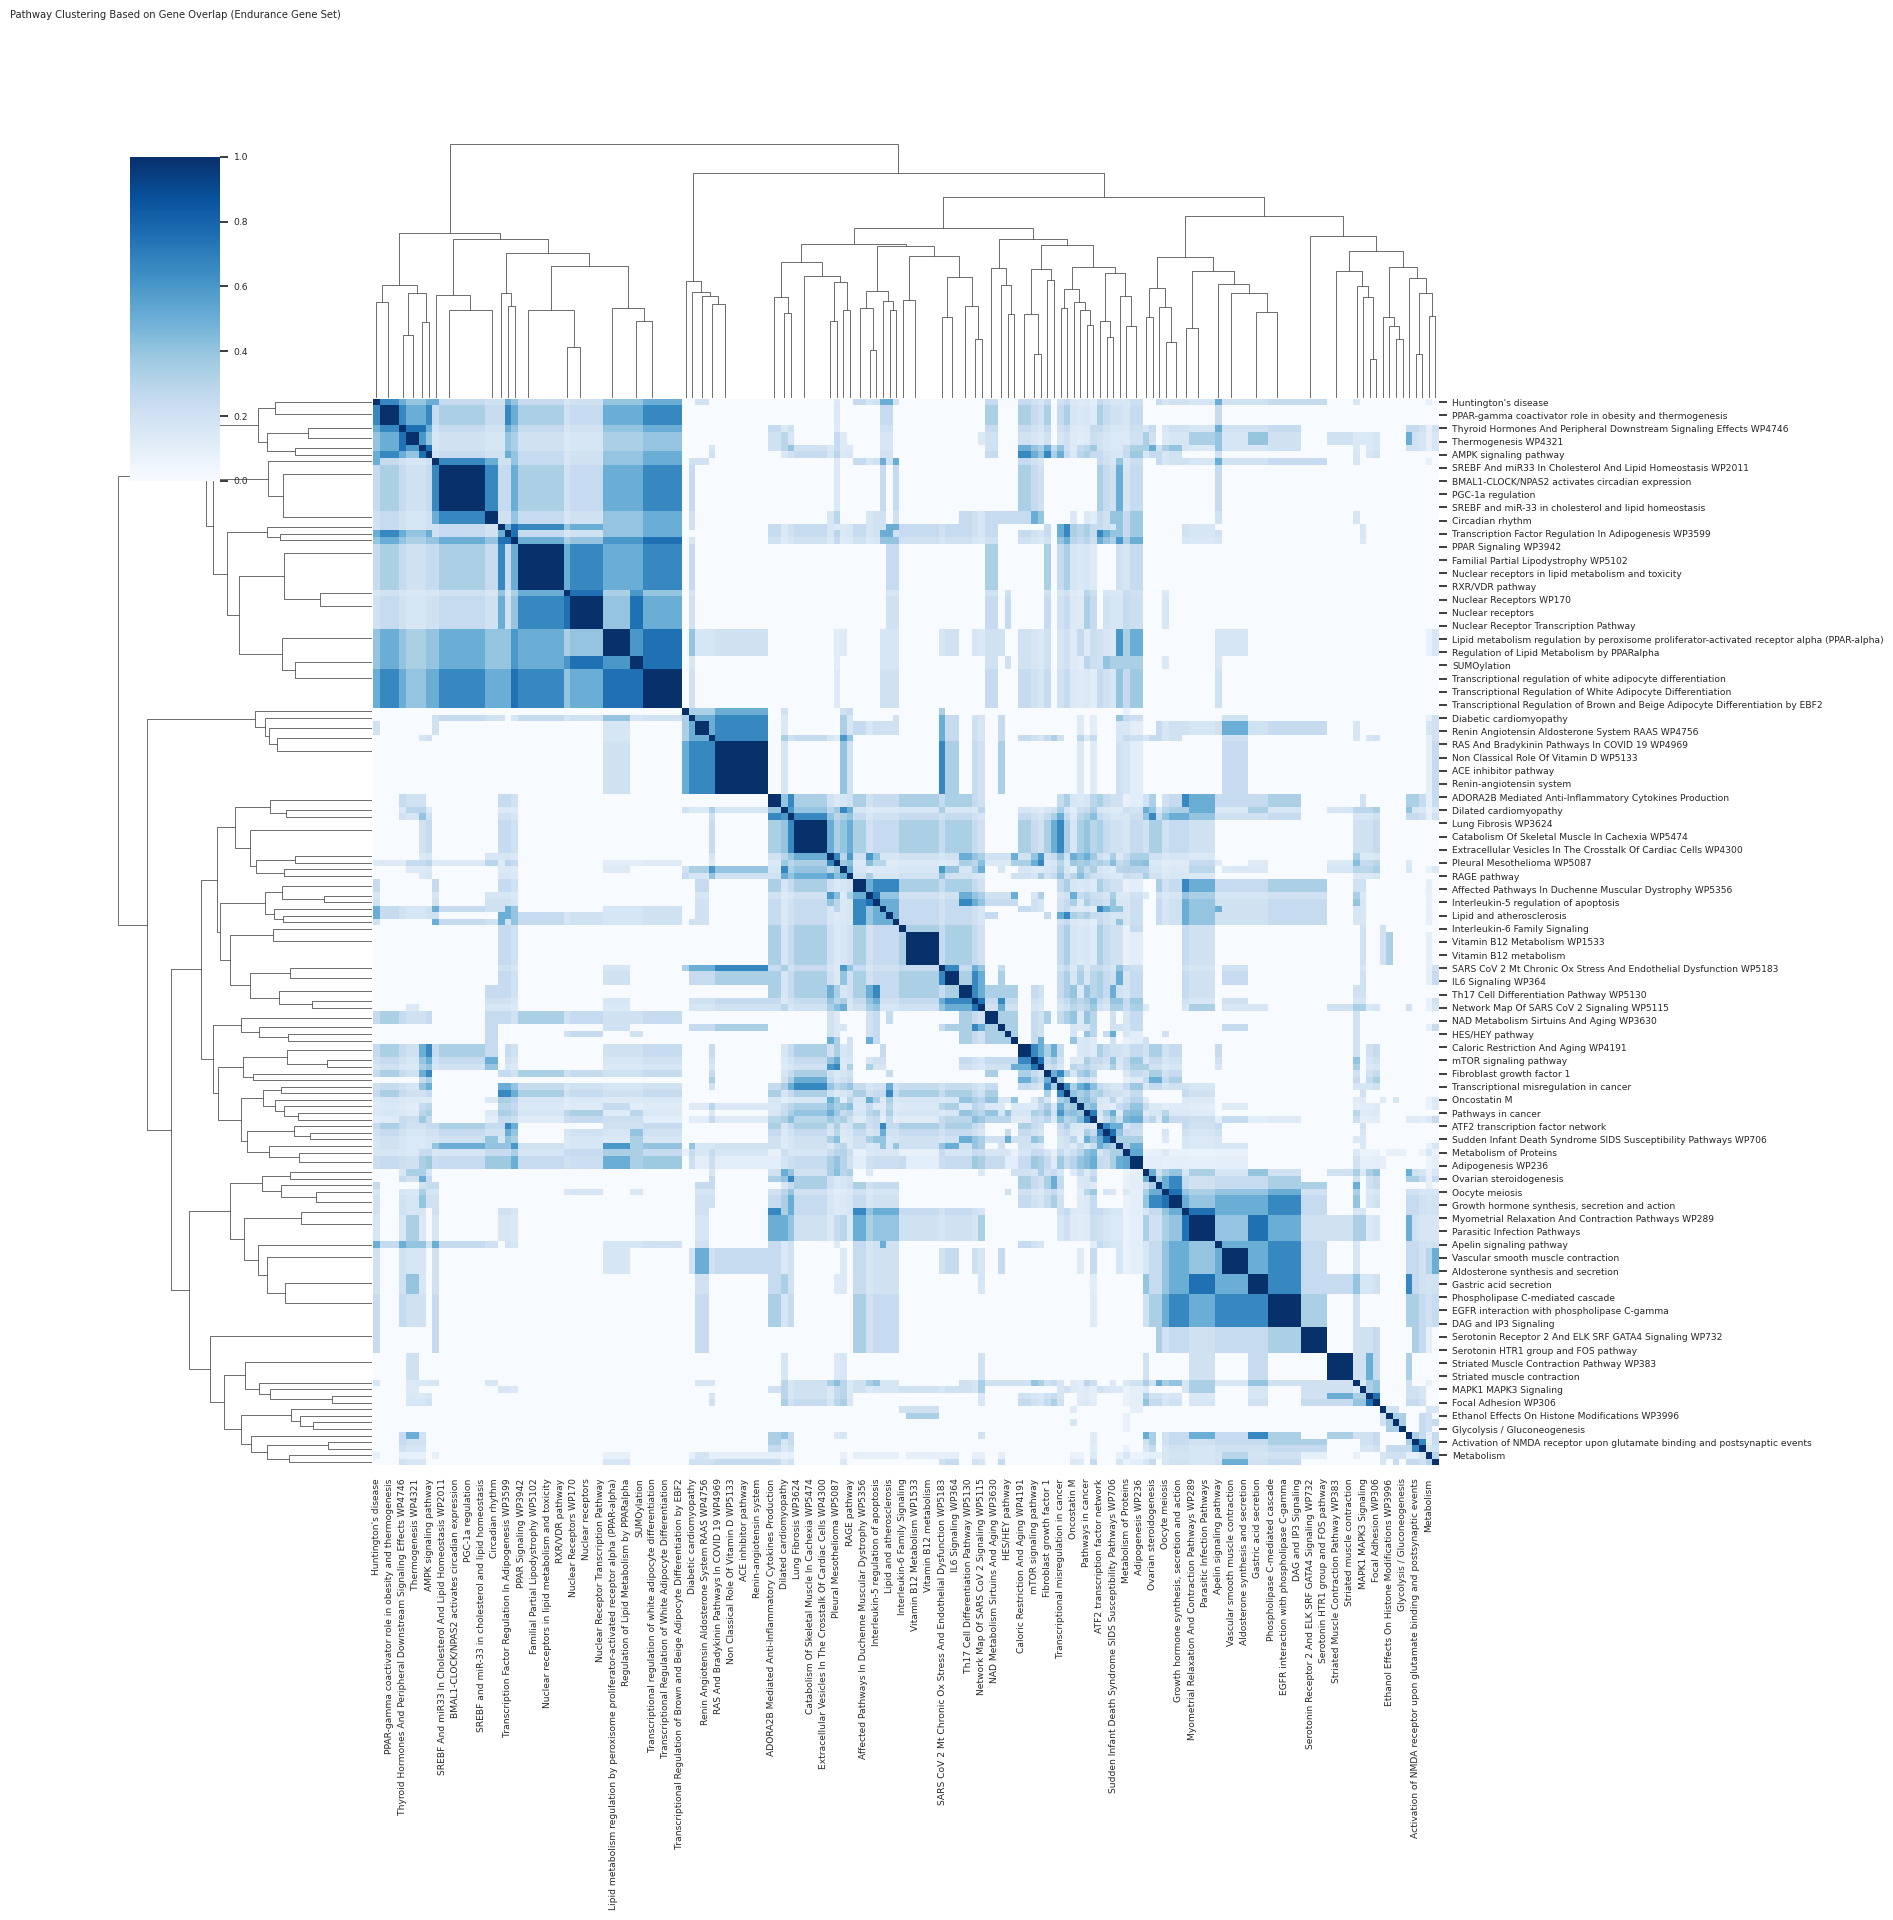

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



def enrichment_clustermap(file_path):

  df = pd.read_csv(file_path)


  df_sig = df[df['Adjusted P-value'] < 0.05].copy()


  pathway_to_genes = {row['Term']: set(str(row['Genes']).replace(';', ' ').split()) for _, row in df_sig.iterrows()}
  pathways = list(pathway_to_genes.keys())


  overlap_matrix = np.zeros((len(pathways), len(pathways)))

  for i in range(len(pathways)):
      for j in range(len(pathways)):
          genes_i = pathway_to_genes[pathways[i]]
          genes_j = pathway_to_genes[pathways[j]]
          if genes_i or genes_j:
              overlap = len(genes_i.intersection(genes_j)) / len(genes_i.union(genes_j))
              overlap_matrix[i, j] = overlap


  overlap_df = pd.DataFrame(overlap_matrix, index=pathways, columns=pathways)


  sns.set(font_scale=0.6)
  clustergrid = sns.clustermap(overlap_df,
                              method='average',
                              cmap='Blues',
                              figsize=(18, 18),
                              metric='euclidean')
  plt.title('Pathway Clustering Based on Gene Overlap (Endurance Gene Set)', pad=100)
  plt.show()
file_paths = ["end wshared all db.csv", 'pow wshared all db.csv', 'str wshared all db.csv']
for file_path in file_paths:
  enrichment_clustermap(file_path)
#


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster


Z = linkage(overlap_df, method='average', metric='euclidean')


max_d = 1.75
clusters = fcluster(Z, max_d, criterion='distance')


pathway_cluster_map = dict(zip(overlap_df.index, clusters))


from collections import defaultdict
cluster_to_pathways = defaultdict(list)
for pathway, cluster_id in pathway_cluster_map.items():
    cluster_to_pathways[cluster_id].append(pathway)


for cluster_id, pathways in cluster_to_pathways.items():
    print(f"\nCluster {cluster_id} ({len(pathways)} pathways):")
    for pathway in pathways:
        print(f" - {pathway}")



Cluster 34 (2 pathways):
 - Myogenesis
 - p53 signaling pathway

Cluster 67 (2 pathways):
 - Hypoxia
 - Pathophysiological Roles Of DUX4 In FSHD1 WP5342

Cluster 22 (4 pathways):
 - Renin secretion
 - cGMP-PKG signaling pathway
 - Calcium signaling pathway
 - Myocyte adrenergic pathway

Cluster 26 (3 pathways):
 - Oxytocin signaling pathway
 - Cellular senescence
 - Human T-cell leukemia virus 1 infection

Cluster 3 (2 pathways):
 - Kaposi sarcoma-associated herpesvirus infection
 - Human cytomegalovirus infection

Cluster 48 (5 pathways):
 - Glucagon signaling pathway
 - Heme Signaling
 - SREBF and miR-33 in cholesterol and lipid homeostasis
 - SREBF And miR33 In Cholesterol And Lipid Homeostasis WP2011
 - Circadian Rhythm Genes WP3594

Cluster 50 (7 pathways):
 - Insulin resistance
 - Transcriptional Regulation of Brown and Beige Adipocyte Differentiation
 - Transcriptional Regulation of Brown and Beige Adipocyte Differentiation by EBF2
 - PPARA Activates Gene Expression
 - Regulati